In [1]:
#@title Importaciones

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import gdown
import plotly.express as px
from scipy.stats import kstest, normaltest, anderson, shapiro
import seaborn as sns

# Cargar el archivo de datos

In [2]:
url = 'https://drive.google.com/uc?id=1G43JAhMxaIXB8AzztG9RGXj9lTLIsX-Q&export=download'

output = '/content/NY.xlsx'

gdown.download(url, output, quiet=False)

file_path = '/content/NY.xlsx'


Downloading...
From: https://drive.google.com/uc?id=1G43JAhMxaIXB8AzztG9RGXj9lTLIsX-Q&export=download
To: /content/NY.xlsx
100%|██████████| 9.46M/9.46M [00:00<00:00, 34.9MB/s]


In [3]:
df=pd.read_excel("NY.xlsx")
df.drop("Column1",inplace=True,axis=1)

# Generalidades

In [4]:
#@title Función de la entropía

def entropia(clases):
  return sp.stats.entropy(clases.value_counts()/len(clases),base=2)

In [5]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17


In [6]:
df.describe() # Borough es categórica
              # Zip es categórica

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE DATE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548
mean,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485,2017-02-26 10:03:23.018403584
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016-09-01 00:00:00
25%,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000,2016-11-29 00:00:00
50%,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,2017-02-28 00:00:00
75%,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000,2017-05-26 00:00:00
max,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2017-08-31 00:00:00
std,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341,NaN


In [7]:
df.info()     # Análisis superficial no hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   EASE-MENT                       84548 non-null  object        
 7   BUILDING CLASS AT PRESENT       84548 non-null  object        
 8   ADDRESS                         84548 non-null  object        
 9   APARTMENT NUMBER                84548 non-null  object        
 10  ZIP CODE                        84548 non-null  int64         
 11  RE

In [8]:
df.shape

(84548, 21)

# Análisis Univariado

In [9]:
#@title Gráficas Bonitas

def plotcheck(column,n):
    counts = df[column].value_counts()
    count_percentage = df[column].value_counts(1)*100
    counts_df = pd.DataFrame({column:counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
    return px.bar(data_frame=counts_df.head(n),
     x=column,
     y='Counts',
     color='Counts',
     color_continuous_scale='blues',
     text_auto=True,
    title=f'Top {n} Items based on Item Counts' )

In [10]:
#@title Renombrando algunas variables

df = df.rename(columns ={'BUILDING CLASS CATEGORY': 'edificio',
                                   'BUILDING CLASS AT TIME OF SALE' : 'eventa',
                                   'BUILDING CLASS AT PRESENT': 'eactual',
                                   'TAX CLASS AT PRESENT' : 'factual',
                                   'TAX CLASS AT TIME OF SALE' : 'fventa'
                                   })

## Borough

In [11]:
distritos = {1:"Manhattan", 2:"Bronx", 3:"Brooklyn", 4:"Queens", 5:"Staten Island"}
df["BOROUGH"]=df["BOROUGH"].map(distritos)
df.rename(columns={"BOROUGH":"Distrito"},inplace=True)

In [12]:
df["Distrito"].describe()

count      84548
unique         5
top       Queens
freq       26736
Name: Distrito, dtype: object

In [13]:
df["Distrito"].value_counts()

Distrito
Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: count, dtype: int64

In [14]:
entropia(df["Distrito"])

2.149127735411322

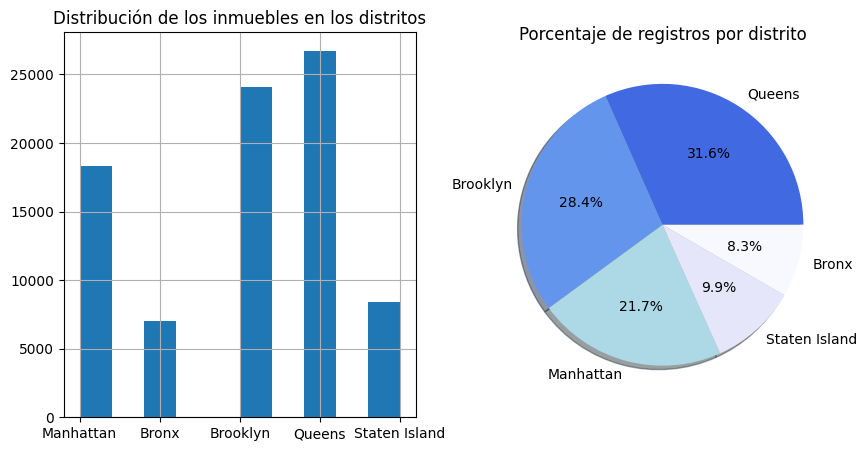

In [15]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].hist(df["Distrito"])
ax[0].set_title("Distribución de los inmuebles en los distritos")
ax[0].grid()
ax[1].pie(df["Distrito"].value_counts().values,labels=df["Distrito"].value_counts().index,autopct="%1.1f%%", shadow = True,
          colors = ["royalblue","cornflowerblue","lightblue","lavender","ghostwhite"])
ax[1].set_title("Porcentaje de registros por distrito")
plt.show()

## Neighborhood

In [16]:
df["NEIGHBORHOOD"].value_counts().head(7)

NEIGHBORHOOD
FLUSHING-NORTH             3068
UPPER EAST SIDE (59-79)    1736
UPPER EAST SIDE (79-96)    1590
UPPER WEST SIDE (59-79)    1439
BEDFORD STUYVESANT         1436
MIDTOWN EAST               1418
BOROUGH PARK               1245
Name: count, dtype: int64

In [17]:
df.rename(columns={"NEIGHBORHOOD":"Barrio"},inplace=True)

In [18]:
df["Barrio"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84548 entries, 0 to 84547
Series name: Barrio
Non-Null Count  Dtype 
--------------  ----- 
84548 non-null  object
dtypes: object(1)
memory usage: 660.7+ KB


In [19]:
df["Barrio"].describe()

count              84548
unique               254
top       FLUSHING-NORTH
freq                3068
Name: Barrio, dtype: object

In [20]:
df[df["Distrito"]=="Staten Island"]["Barrio"].value_counts()

Barrio
GREAT KILLS                  776
NEW SPRINGVILLE              590
BULLS HEAD                   393
ELTINGVILLE                  345
MIDLAND BEACH                316
WEST NEW BRIGHTON            315
PORT RICHMOND                288
ARDEN HEIGHTS                278
MARINERS HARBOR              273
WESTERLEIGH                  267
TOTTENVILLE                  243
WILLOWBROOK                  237
SOUTH BEACH                  232
NEW BRIGHTON                 215
ROSEBANK                     199
ANNADALE                     198
ROSSVILLE                    183
NEW DORP                     180
GRANT CITY                   168
PRINCES BAY                  144
MANOR HEIGHTS                142
CASTLETON CORNERS            140
HUGUENOT                     134
WOODROW                      131
STAPLETON                    118
NEW DORP-BEACH               117
CLOVE LAKES                  117
CONCORD                      108
TRAVIS                       107
NEW DORP-HEIGHTS             106
GRA

In [21]:
entropia(df["Barrio"])

7.367298020430333

In [22]:
sum(df["Barrio"]=="FLUSHING-NORTH")/len(df)

0.03628707952878838

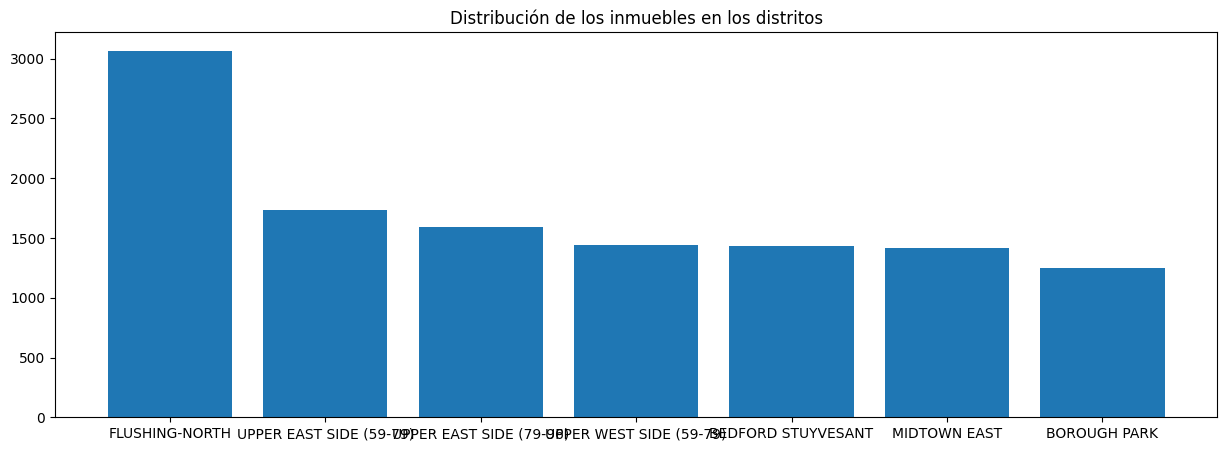

In [23]:
plt.figure(figsize=(15,5))
plt.bar(df["Barrio"].value_counts()[:7].index,df["Barrio"].value_counts()[:7].values)
plt.title("Distribución de los inmuebles en los distritos")
plt.show()

## Zip Code

In [24]:
len(df["ZIP CODE"].unique())

186

In [25]:
df.rename(columns={"ZIP CODE":"Postal"},inplace=True)

In [26]:
df["Postal"].unique()   # Hay un 0 raro

array([10009,     0, 10002, 10011, 10001, 10014, 10010, 10013, 10038,
       10007, 10036, 10019, 10018, 10003, 10005, 10004, 10006, 10016,
       10012, 10026, 10030, 10031, 10027, 10035, 10037, 10029, 10039,
       10032, 10128, 10463, 10034, 10025, 10022, 10017, 10167, 10023,
       10105, 10033, 10044, 10280, 10282, 10281, 10065, 10021, 10075,
       10028, 10024, 10069, 10040, 10457, 10458, 10451, 10456, 10469,
       10466, 10475, 10468, 10467, 10460, 10473, 10472, 10464, 10462,
       10803, 10465, 10459, 10471, 10453, 10452, 10454, 10474, 10455,
       10461, 10470, 11228, 11214, 11220, 11209, 11219, 11221, 11233,
       11213, 11206, 11216, 11205, 11238, 11226, 11204, 11234, 11217,
       11201, 11218, 11232, 11230, 11235, 11212, 11237, 11207, 11236,
       11239, 11231, 11249, 11224, 11225, 11208, 11210, 11203, 11229,
       11215, 11223, 11222, 11211, 11370, 11691, 11692, 11102, 11106,
       11103, 11377, 11105, 11101, 11361, 11360, 11357, 11358, 11364,
       11693, 11694,

In [27]:
df[["Postal"]] = df[["Postal"]].astype(str)

In [28]:
df[["Postal"]]= df[["Postal"]].replace("0",np.nan)

In [29]:
df[df["Postal"].isna()].shape

(982, 21)

In [30]:
df["Postal"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84548 entries, 0 to 84547
Series name: Postal
Non-Null Count  Dtype 
--------------  ----- 
83566 non-null  object
dtypes: object(1)
memory usage: 660.7+ KB


In [31]:
df["Postal"].describe()

count     83566
unique      185
top       10314
freq       1687
Name: Postal, dtype: object

In [32]:
df["Postal"].value_counts()

Postal
10314    1687
11354    1384
11201    1324
11235    1312
11234    1165
         ... 
10105       5
11430       1
10281       1
10803       1
10167       1
Name: count, Length: 185, dtype: int64

In [33]:
entropia(df["Postal"])

7.193299949059598

In [34]:
df[df["Distrito"]=="Queens"]["Postal"].value_counts()

Postal
11354    1384
11375    1144
11355     932
11385     821
11357     808
         ... 
11363     129
11001      70
11040      42
11109      31
11430       1
Name: count, Length: 62, dtype: int64

In [35]:
df[df["Distrito"]=="Queens"]["Postal"].unique()

array(['11370', '11691', '11692', nan, '11102', '11106', '11103', '11377',
       '11105', '11101', '11361', '11360', '11357', '11358', '11364',
       '11693', '11694', '11426', '11428', '11004', '11001', '11435',
       '11411', '11356', '11354', '11420', '11368', '11373', '11372',
       '11363', '11362', '11369', '11378', '11040', '11375', '11355',
       '11365', '11367', '11366', '11374', '11385', '11005', '11421',
       '11379', '11432', '11423', '11412', '11427', '11429', '11433',
       '11414', '11422', '11415', '11418', '11413', '11109', '11104',
       '11416', '11417', '11419', '11436', '11434', '11430'], dtype=object)

In [36]:
df[df["Distrito"]=="Staten Island"].shape

(8410, 21)

In [37]:
df[(df["Postal"].str.slice(stop=3)=="103")]["Distrito"].value_counts()

Distrito
Staten Island    8191
Name: count, dtype: int64

## Land Square Feet

In [38]:
df['LAND SQUARE FEET'].describe()

count     84548
unique     6062
top         -  
freq      26252
Name: LAND SQUARE FEET, dtype: object

In [39]:
df["LAND SQUARE FEET"].value_counts()

LAND SQUARE FEET
 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
5886         1
76712        1
6777         1
10833        1
10796        1
Name: count, Length: 6062, dtype: int64

In [40]:
df[df["LAND SQUARE FEET"]=="0"]["LAND SQUARE FEET"].count()/len(df)

0.12213180678431187

In [41]:
faltantes = df[(df["LAND SQUARE FEET"]=="0")|(df["LAND SQUARE FEET"]==" -  ")]["Distrito"].value_counts()/df["Distrito"].value_counts()

In [42]:
faltantes

Distrito
Bronx            0.242020
Brooklyn         0.358465
Manhattan        0.898449
Queens           0.330678
Staten Island    0.114625
Name: count, dtype: float64

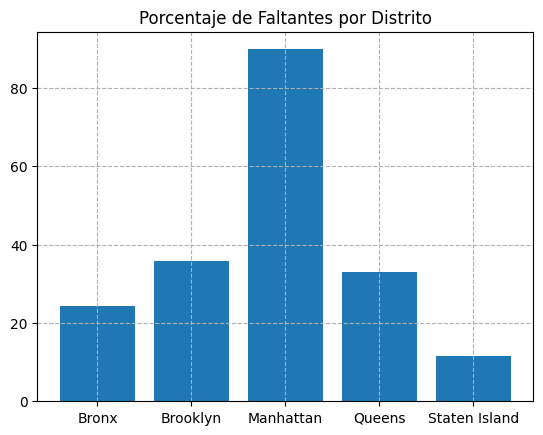

In [43]:
plt.bar(faltantes.index,faltantes.values*100)
plt.title("Porcentaje de Faltantes por Distrito")
plt.grid(ls="--")
plt.show()

## Gross Square Feet

In [44]:
df["GROSS SQUARE FEET"].describe()

count     84548
unique     5691
top         -  
freq      27612
Name: GROSS SQUARE FEET, dtype: object

In [45]:
df["GROSS SQUARE FEET"].value_counts()

GROSS SQUARE FEET
 -       27612
0        11417
2400       386
1800       361
2000       359
         ...  
13740        1
12256        1
3823         1
7768         1
64117        1
Name: count, Length: 5691, dtype: int64

In [46]:
df[df["GROSS SQUARE FEET"]==" -  "]["GROSS SQUARE FEET"].count()/len(df)

0.32658371575909545

In [47]:
faltantes = df[(df["GROSS SQUARE FEET"]=="0")|(df["GROSS SQUARE FEET"]==" -  ")]["Distrito"].value_counts()/df["Distrito"].value_counts()

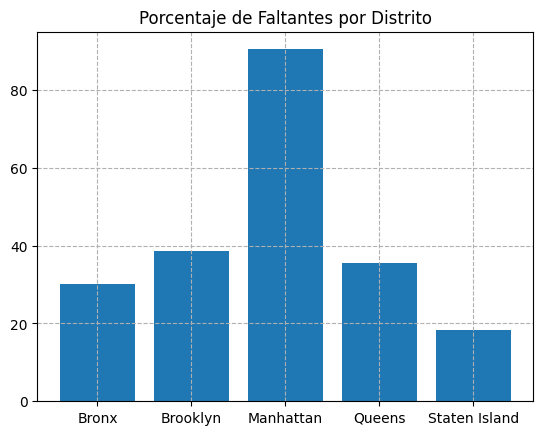

In [48]:
plt.bar(faltantes.index,faltantes.values*100)
plt.title("Porcentaje de Faltantes por Distrito")
plt.grid(ls = "--")
plt.show()

## Year Built

In [49]:
df["YEAR BUILT"].unique()

array([1900, 1913, 1920, 1910, 2009, 1925, 1902, 1928, 1930, 1935, 1937,
       1915, 1950, 1929, 1901, 1940, 2005,    0, 1989, 2014, 2008, 1965,
       2013, 2003, 2006, 2007, 1951, 1899, 1850, 1905, 1864, 1917, 1911,
       1983, 1926, 1963, 1960, 1889, 1898, 1939, 1938, 1927, 1909, 1958,
       1904, 1907, 1987, 1931, 1984, 1948, 2004, 1918, 1875, 2012, 1973,
       2011, 1922, 2001, 1932, 1980, 1908, 1953, 1906, 2015, 1946, 1921,
       2010, 1954, 1111, 1924, 1990, 1890, 1991, 1988, 1895, 2016, 1957,
       1986, 1966, 1998, 1870, 1923, 1969, 2017, 1968, 1934, 1956, 1982,
       1914, 1903, 1967, 1840, 1912, 1964, 1955, 1961, 1851, 2000, 1959,
       1962, 1945, 1972, 1976, 1916, 1880, 1970, 1846, 1941, 1952, 1896,
       1985, 1981, 1888, 1947, 1975, 1974, 2002, 1994, 1892, 1894, 1891,
       1996, 1997, 1949, 1999, 1800, 1979, 1971, 1977, 1942, 1978, 1826,
       1881, 1919, 1883, 1936, 1993, 1995, 1933, 1992, 1943, 1944, 1847,
       1829, 1844, 1835, 1852, 1856, 1854, 1832, 18

In [50]:
df.rename(columns={"YEAR BUILT":"Año"},inplace=True)

In [51]:
x=df["Año"].value_counts()

<ipython-input-52-0fc0b4f0de83>:2: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1880,2020,5)


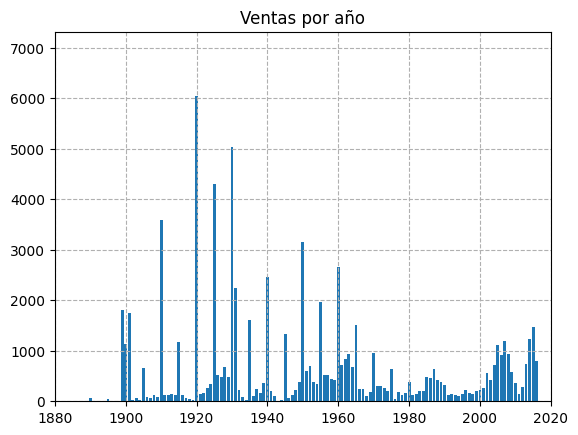

In [52]:
plt.bar(x.index,x.values)
plt.xlim(1880,2020,5)
plt.grid(ls = "--")
plt.title("Ventas por año")
plt.show()

In [53]:
def decadas(año):
  return año - (año%10)

df["Año"] = df["Año"].apply(decadas)

In [54]:
df["Año"].value_counts()

Año
1920    13406
1930    10119
1950     9038
1960     8128
0        6970
2000     6911
1910     5553
2010     5033
1940     4942
1900     4022
1980     3439
1970     3179
1890     1922
1990     1748
1880       41
1800       37
1870       19
1850       17
1840       13
1860        4
1830        3
1820        2
1110        1
1680        1
Name: count, dtype: int64

In [55]:
df.loc[df["Año"]==1110,"Año"]=0

In [56]:
df.loc[df["Año"]==0,"Año"]=np.nan

In [57]:
df.loc[df["Año"]<=1880,"Año"]=1880

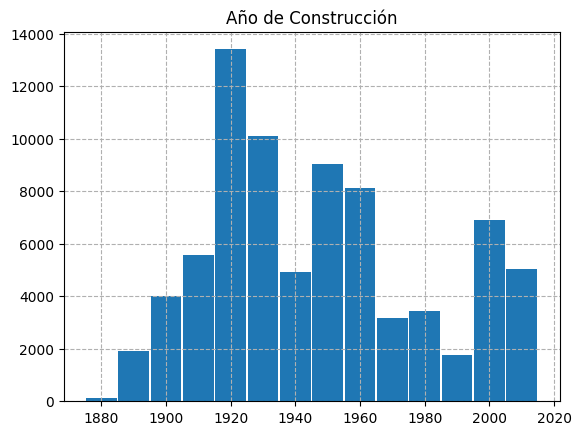

In [58]:
valores=df["Año"].value_counts()
plt.bar(valores.index,valores.values,width=9.5)
plt.title("Año de Construcción")
plt.grid(ls ="--")
plt.show()

In [59]:
df["Año"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 84548 entries, 0 to 84547
Series name: Año
Non-Null Count  Dtype  
--------------  -----  
77577 non-null  float64
dtypes: float64(1)
memory usage: 660.7 KB


In [60]:
df["Año"].describe()

count    77577.000000
mean      1946.949740
std         33.254497
min       1880.000000
25%       1920.000000
50%       1940.000000
75%       1970.000000
max       2010.000000
Name: Año, dtype: float64

## Precio de venta

In [61]:
CEROS= (df['SALE PRICE'] == "0").sum()
print("Cantidad de valores iguales a cero:", CEROS)

Cantidad de valores iguales a cero: 10228


In [62]:
df['SALE PRICE'].replace(' -  ', np.nan, inplace=True )

In [63]:
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'])

In [64]:
num_nan = df['SALE PRICE'].isna().sum()
total = df['SALE PRICE'].shape[0]
porcentaje_nan = (num_nan / total) * 100
print(f"Porcentaje de NaN en la columna 'SALE PRICE': {porcentaje_nan:.2f}%")

Porcentaje de NaN en la columna 'SALE PRICE': 17.22%


In [65]:
df["SALE PRICE"].value_counts()

SALE PRICE
0.0          10228
10.0           766
450000.0       427
550000.0       416
650000.0       414
             ...  
191100.0         1
811000.0         1
782990.0         1
2784765.0        1
69300.0          1
Name: count, Length: 10007, dtype: int64

In [66]:
sin_Nan= df["SALE PRICE"].dropna()
print(sin_Nan)

0         6625000.0
3         3936272.0
4         8000000.0
6         3192840.0
9        16232000.0
            ...    
84543      450000.0
84544      550000.0
84545      460000.0
84546    11693337.0
84547       69300.0
Name: SALE PRICE, Length: 69987, dtype: float64


In [67]:
media_precio_ventas=sin_Nan.mean()
mediana_precio_ventas=sin_Nan.median()
varianza_precio_ventas=sin_Nan.var()
desviacion_precio_ventas=sin_Nan.std()

print("Media de unidades comerciales:", media_precio_ventas)
print("Mediana de unidades comerciales:", mediana_precio_ventas)
print("Varianza de unidades comerciales:", varianza_precio_ventas)
print("Desviacion estandar de unidades comerciales:", desviacion_precio_ventas)

Media de unidades comerciales: 1276456.4977638705
Mediana de unidades comerciales: 530000.0
Varianza de unidades comerciales: 130079849507172.7
Desviacion estandar de unidades comerciales: 11405255.345987337


In [68]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['SALE PRICE'].quantile(0.25)
Q3 = df['SALE PRICE'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dato4="SALE PRICE"
outliers = df[(df[dato4] < lower_bound) | (df[dato4] > upper_bound)]
print("Valores atípicos:")
outliers.shape

Valores atípicos:


(6652, 21)

In [69]:
plotcheck("SALE PRICE",5)

In [70]:
#@title Normalidad

data = sin_Nan

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Anderson Darling
print('******Anderson********************************************')
result = anderson(data)
print('Estadistico Anderson para 15, 10, 5, 2.5, 1: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Datos parecen normales (Falla rechazar H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Datos no parecen normales (Se rechaza H0)' % (sl, cv))
'''Critical values provided are for the following significance levels:
normal 15%, 10%, 5%, 2.5%, 1%'''

******Kolmogorov*********************************************
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.85187
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.03801
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 297362.39624
******Anderson********************************************
Estadistico Anderson para 15, 10, 5, 2.5, 1: 21841.814
15.000: 0.576, Datos no parecen normales (Se rechaza H0)
10.000: 0.656, Datos no parecen normales (Se rechaza H0)
5.000: 0.787, Datos no parecen normales (Se rechaza H0)
2.500: 0.918, Datos no parecen normales (Se rechaza H0)
1.000: 1.092, Datos no parecen normales (Se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



'Critical values provided are for the following significance levels:\nnormal 15%, 10%, 5%, 2.5%, 1%'

In [71]:
df.rename(columns={"SALE PRICE":"Precio"},inplace=True)

In [72]:
df[["Precio"]].describe()

,Precio
count,6.998700e+04
mean,1.276456e+06
std,1.140526e+07
min,0.000000e+00
25%,2.250000e+05
50%,5.300000e+05
75%,9.500000e+05
max,2.210000e+09


In [73]:
df[["Precio"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precio  69987 non-null  float64
dtypes: float64(1)
memory usage: 660.7 KB


In [74]:
x=df[df["Precio"]!=0][["Precio"]]

In [75]:
x.describe()

,Precio
count,5.975900e+04
mean,1.494927e+06
std,1.232953e+07
min,1.000000e+00
25%,3.700000e+05
50%,6.255000e+05
75%,1.070000e+06
max,2.210000e+09


## Fecha de venta

In [76]:
dato1="RESIDENTIAL UNITS"
dato2="COMMERCIAL UNITS"
dato3="TOTAL UNITS"
dato4="SALE PRICE"
dato5="SALE DATE"

In [77]:
total_filas = df.shape[0]
print("Total de filas:", total_filas)
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

Total de filas: 84548


In [78]:
entropia=df["SALE DATE"]
frecuencia=entropia.value_counts()
total=sp.stats.entropy(frecuencia,base=2)
print(total)

8.030990796577237


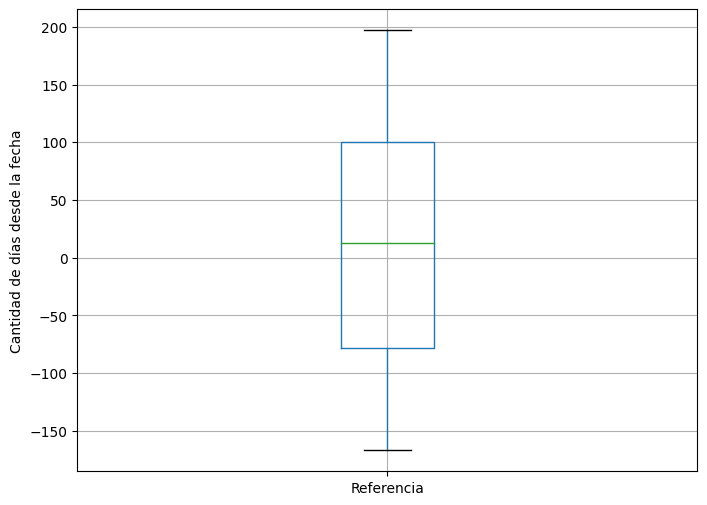

In [79]:
referencia = pd.to_datetime('2017-02-15')
df['Referencia'] = (df['SALE DATE'] - referencia).dt.days

plt.figure(figsize=(8, 6))
df.boxplot(column='Referencia')
plt.ylabel('Cantidad de días desde la fecha')
plt.show()

In [80]:
plotcheck("SALE DATE",5)

In [81]:
df[dato5] = pd.to_datetime(df[dato5])

fechas_diferentes= df[dato5].nunique()
print("Numero de fechas", fechas_diferentes)
total_fechas = len(df)
conteo_fechas = df['SALE DATE'].value_counts()
print(conteo_fechas)

Numero de fechas 364
SALE DATE
2017-06-29    544
2017-06-15    530
2016-12-22    527
2017-05-25    511
2016-10-06    508
             ... 
2017-01-08      2
2017-07-09      2
2016-11-27      2
2017-08-13      1
2017-06-04      1
Name: count, Length: 364, dtype: int64


In [82]:
porcentaje_fechas = (conteo_fechas / total_fechas) * 100
porcentaje_fechas

SALE DATE
2017-06-29    0.643421
2017-06-15    0.626863
2016-12-22    0.623315
2017-05-25    0.604390
2016-10-06    0.600842
                ...   
2017-01-08    0.002366
2017-07-09    0.002366
2016-11-27    0.002366
2017-08-13    0.001183
2017-06-04    0.001183
Name: count, Length: 364, dtype: float64

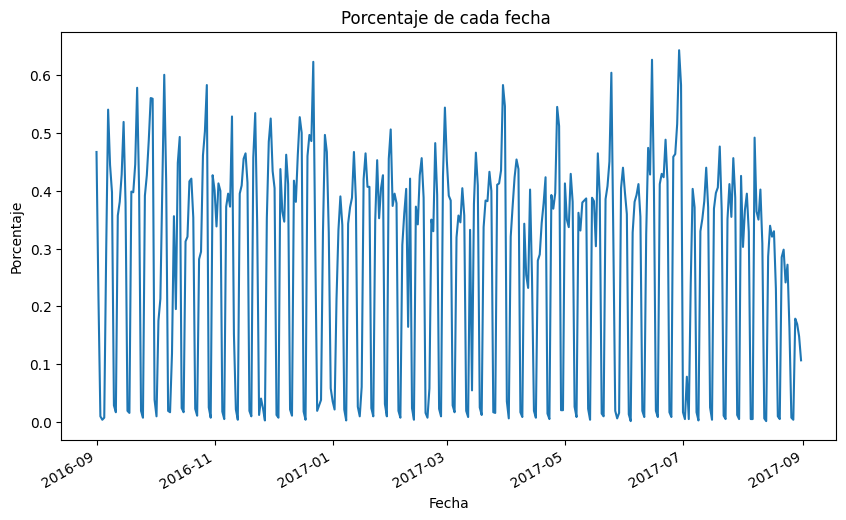

In [83]:
plt.figure(figsize=(10, 6))
porcentaje_fechas.plot()
plt.title('Porcentaje de cada fecha ')
plt.xlabel('Fecha')
plt.ylabel('Porcentaje')

plt.show()


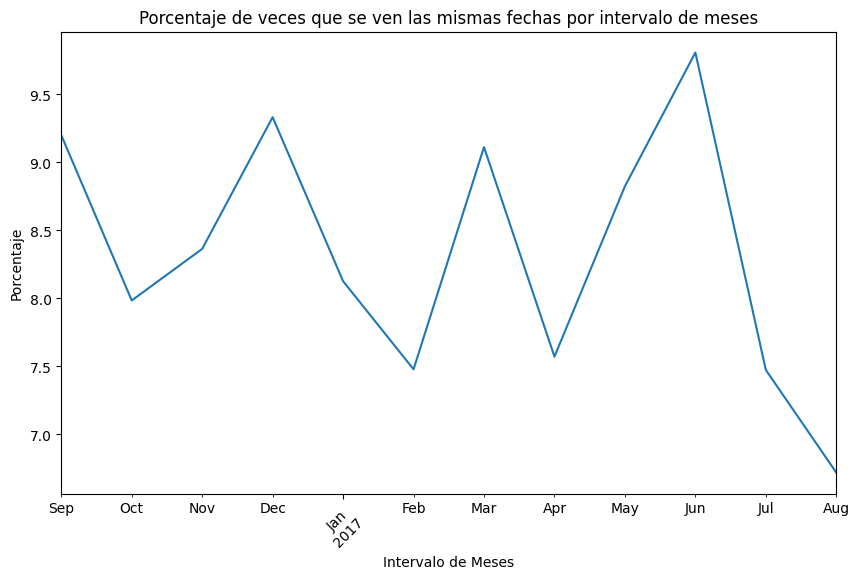

In [84]:
#Mes y el año de cada fecha
df['Año-Mes'] = df[dato5].dt.to_period('M') #Solo informacion del mes y año

conteo_intervalos = df.groupby('Año-Mes').size()

total_intervalos = len(conteo_intervalos)
total_fechas = len(df)

porcentaje_intervalos = (conteo_intervalos / total_fechas) * 100

plt.figure(figsize=(10, 6))
porcentaje_intervalos.plot()
plt.title('Porcentaje de veces que se ven las mismas fechas por intervalo de meses')
plt.xlabel('Intervalo de Meses')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()


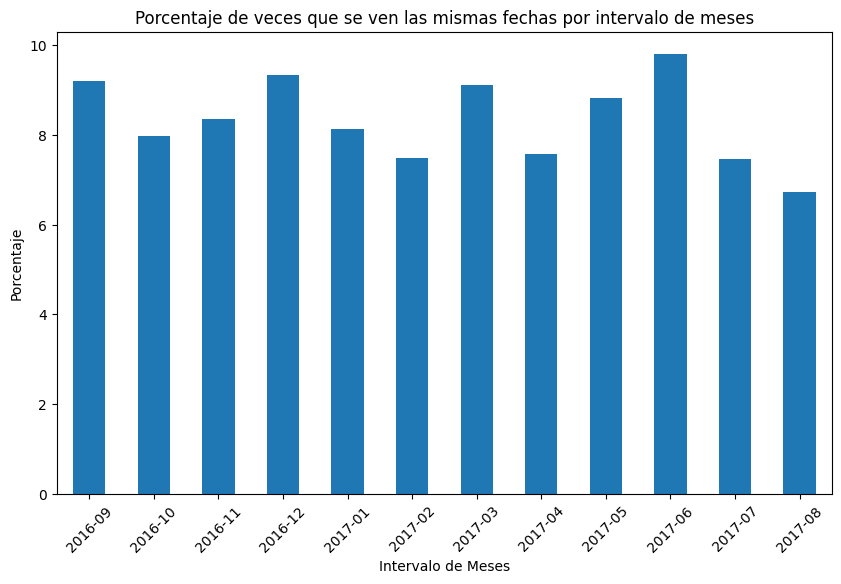

In [85]:
#Mes y el año de cada fecha
df['Año-Mes'] = df[dato5].dt.to_period('M') #Solo informacion del mes y año

conteo_intervalos = df.groupby('Año-Mes').size()

total_intervalos = len(conteo_intervalos)
total_fechas = len(df)

porcentaje_intervalos = (conteo_intervalos / total_fechas) * 100

plt.figure(figsize=(10, 6))
porcentaje_intervalos.plot(kind="bar")
plt.title('Porcentaje de veces que se ven las mismas fechas por intervalo de meses')
plt.xlabel('Intervalo de Meses')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.show()


In [86]:
#Promedio de precio por mes
df['Mes'] = df['SALE DATE'].dt.to_period('M')

promedio_venta_mes = df.groupby('Mes')[['Precio']].mean()
print(promedio_venta_mes)


               Precio
Mes                  
2016-09  1.214019e+06
2016-10  1.132402e+06
2016-11  1.231504e+06
2016-12  1.627620e+06
2017-01  1.390985e+06
2017-02  1.049032e+06
2017-03  1.202761e+06
2017-04  1.144988e+06
2017-05  1.594840e+06
2017-06  1.192981e+06
2017-07  1.222623e+06
2017-08  1.230033e+06


In [87]:
df.rename(columns={"SALE DATE":"Fecha"},inplace=True)

## Unidades residenciales

In [88]:
df["RESIDENTIAL UNITS"].value_counts()

RESIDENTIAL UNITS
1      34722
0      24783
2      16049
3       4608
4       1346
       ...  
179        1
75         1
193        1
153        1
128        1
Name: count, Length: 176, dtype: int64

In [89]:
media_unidades_residenciales=df["RESIDENTIAL UNITS"].mean()
mediana_unidades_residenciales=df["RESIDENTIAL UNITS"].median()
varianza_unidades_residenciales=df["RESIDENTIAL UNITS"].var()
desviacion_unidades_residenciales=df["RESIDENTIAL UNITS"].std()

print("Media de unidades residenciales:", media_unidades_residenciales)
print("Mediana de unidades residenciales:", mediana_unidades_residenciales)
print("Varianza de unidades residenciales:", varianza_unidades_residenciales)
print("Desviacion estandar de unidades residenciales:", desviacion_unidades_residenciales)

Media de unidades residenciales: 2.0252637554998345
Mediana de unidades residenciales: 1.0
Varianza de unidades residenciales: 279.5930788392047
Desviacion estandar de unidades residenciales: 16.72103701446787


In [90]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['RESIDENTIAL UNITS'].quantile(0.25)
Q3 = df['RESIDENTIAL UNITS'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df[(df['RESIDENTIAL UNITS'] < lower_bound) | (df['RESIDENTIAL UNITS'] > upper_bound)]
print("Valores atípicos:")
outliers.shape

Valores atípicos:


(2767, 24)

In [91]:
plotcheck("RESIDENTIAL UNITS",10)

In [92]:
#mu, sigma = 0, 0.1 # media y desviación típica
data = df[dato1]

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Anderson Darling
print('******Anderson********************************************')
result = anderson(data)
print('Estadistico Anderson para 15, 10, 5, 2.5, 1: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Datos parecen normales (Falla rechazar H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Datos no parecen normales (Se rechaza H0)' % (sl, cv))
'''Critical values provided are for the following significance levels:
normal 15%, 10%, 5%, 2.5%, 1%'''

******Kolmogorov*********************************************
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.54822
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.04599
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 284645.86595
******Anderson********************************************
Estadistico Anderson para 15, 10, 5, 2.5, 1: 26935.799
15.000: 0.576, Datos no parecen normales (Se rechaza H0)
10.000: 0.656, Datos no parecen normales (Se rechaza H0)
5.000: 0.787, Datos no parecen normales (Se rechaza H0)
2.500: 0.918, Datos no parecen normales (Se rechaza H0)
1.000: 1.092, Datos no parecen normales (Se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



'Critical values provided are for the following significance levels:\nnormal 15%, 10%, 5%, 2.5%, 1%'

In [93]:
df.rename(columns={"RESIDENTIAL UNITS":"Unidades_res"},inplace=True)

In [94]:
df[["Unidades_res"]].value_counts()

Unidades_res
1               34722
0               24783
2               16049
3                4608
4                1346
                ...  
143                 1
142                 1
139                 1
138                 1
165                 1
Name: count, Length: 176, dtype: int64

## Unidades comerciales

In [95]:
media_unidades_comerciales=df["COMMERCIAL UNITS"].mean()
mediana_unidades_comerciales=df["COMMERCIAL UNITS"].median()
varianza_unidades_comerciales=df["COMMERCIAL UNITS"].var()
desviacion_unidades_comerciales=df["COMMERCIAL UNITS"].std()

print("Media de unidades comerciales:", media_unidades_comerciales)
print("Mediana de unidades comerciales:", mediana_unidades_comerciales)
print("Varianza de unidades comerciales:", varianza_unidades_comerciales)
print("Desviacion estandar de unidades comerciales:", desviacion_unidades_comerciales)

Media de unidades comerciales: 0.19355868855561337
Mediana de unidades comerciales: 0.0
Varianza de unidades comerciales: 75.91956440869325
Desviacion estandar de unidades comerciales: 8.713183368246835


In [96]:
Q1 = df['COMMERCIAL UNITS'].quantile(0.25)
Q3 = df['COMMERCIAL UNITS'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dato2="COMMERCIAL UNITS"
outliers = df[(df[dato2] < lower_bound) | (df[dato2] > upper_bound)]
print("Valores atípicos:")
outliers.shape

Valores atípicos:


(5119, 24)

In [97]:
plotcheck("COMMERCIAL UNITS",5)

In [98]:
data = df[dato2]

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Anderson Darling
print('******Anderson********************************************')
result = anderson(data)
print('Estadistico Anderson para 15, 10, 5, 2.5, 1: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Datos parecen normales (Falla rechazar H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Datos no parecen normales (Se rechaza H0)' % (sl, cv))
'''Critical values provided are for the following significance levels:
normal 15%, 10%, 5%, 2.5%, 1%'''

******Kolmogorov*********************************************
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.50000
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.00458
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 421901.43448
******Anderson********************************************
Estadistico Anderson para 15, 10, 5, 2.5, 1: 31273.080
15.000: 0.576, Datos no parecen normales (Se rechaza H0)
10.000: 0.656, Datos no parecen normales (Se rechaza H0)
5.000: 0.787, Datos no parecen normales (Se rechaza H0)
2.500: 0.918, Datos no parecen normales (Se rechaza H0)
1.000: 1.092, Datos no parecen normales (Se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



'Critical values provided are for the following significance levels:\nnormal 15%, 10%, 5%, 2.5%, 1%'

In [99]:
df.rename(columns={"COMMERCIAL UNITS":"Unidades_com"},inplace=True)

In [100]:
df[["Unidades_com"]].value_counts()

Unidades_com
0               79429
1                3558
2                 817
3                 259
4                 137
5                  74
6                  70
7                  31
8                  26
9                  20
10                 17
12                 12
15                 11
11                 10
14                  6
17                  6
35                  4
254                 4
20                  4
13                  4
19                  3
22                  3
18                  3
42                  3
436                 2
422                 2
25                  2
26                  2
16                  2
126                 2
91                  1
62                  1
67                  1
73                  1
184                 1
147                 1
172                 1
56                  1
318                 1
59                  1
27                  1
55                  1
52                  1
51                  1
49                 

## Unidades totales

In [101]:
media_unidades_totales=df[dato3].mean()
mediana_unidades_totales=df[dato3].median()
varianza_unidades_totales=df[dato3].var()
desviacion_unidades_totales=df[dato3].std()

print("Media de unidades comerciales:", media_unidades_totales)
print("Mediana de unidades comerciales:", mediana_unidades_totales)
print("Varianza de unidades comerciales:", varianza_unidades_totales)
print("Desviacion estandar de unidades comerciales:", desviacion_unidades_totales)

Media de unidades comerciales: 2.249183895538629
Mediana de unidades comerciales: 1.0
Varianza de unidades comerciales: 359.958960030383
Desviacion estandar de unidades comerciales: 18.97258443202673


In [102]:
Q1 = df['TOTAL UNITS'].quantile(0.25)
Q3 = df['TOTAL UNITS'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dato3="TOTAL UNITS"
outliers = df[(df[dato3] < lower_bound) | (df[dato3] > upper_bound)]
print("Valores atípicos:")
outliers.shape

Valores atípicos:


(5104, 24)

In [103]:
plotcheck("TOTAL UNITS",5)

In [104]:
#mu, sigma = 0, 0.1 # media y desviación típica
data = df[dato3]

print('******Kolmogorov*********************************************')
##Prueba KS
stat, p = kstest(data, 'norm')
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad con KS')
    print("\t P_valor KS= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Shapiro
print('******Shapiro*********************************************')
stat, p = shapiro(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad')
    print("\t P_valor SH= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba  D’Agostino y Pearson’s
print('******D’Agostino******************************************')
stat, p = normaltest(data)
if p<0.05: #Se rechaza la normalidad
    print('Se rechaza la normalidad D’Agostino')
    print("\t P_valor DA= {:.7f} \t stat = {:.5f}".format( p, stat))
##Prueba Anderson Darling
print('******Anderson********************************************')
result = anderson(data)
print('Estadistico Anderson para 15, 10, 5, 2.5, 1: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, Datos parecen normales (Falla rechazar H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, Datos no parecen normales (Se rechaza H0)' % (sl, cv))
'''Critical values provided are for the following significance levels:
normal 15%, 10%, 5%, 2.5%, 1%'''

******Kolmogorov*********************************************
Se rechaza la normalidad con KS
	 P_valor KS= 0.0000000 	 stat = 0.60761
******Shapiro*********************************************
Se rechaza la normalidad
	 P_valor SH= 0.0000000 	 stat = 0.04313
******D’Agostino******************************************
Se rechaza la normalidad D’Agostino
	 P_valor DA= 0.0000000 	 stat = 288990.42568
******Anderson********************************************
Estadistico Anderson para 15, 10, 5, 2.5, 1: 27277.630
15.000: 0.576, Datos no parecen normales (Se rechaza H0)
10.000: 0.656, Datos no parecen normales (Se rechaza H0)
5.000: 0.787, Datos no parecen normales (Se rechaza H0)
2.500: 0.918, Datos no parecen normales (Se rechaza H0)
1.000: 1.092, Datos no parecen normales (Se rechaza H0)


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



'Critical values provided are for the following significance levels:\nnormal 15%, 10%, 5%, 2.5%, 1%'

## Tipo de Edificio (Clase)

In [105]:
plotcheck('edificio',5)

In [106]:
df['edificio'].mode()

0    01 ONE FAMILY DWELLINGS                    
Name: edificio, dtype: object

## Tipo de Edificio (Código)

In [107]:
#@title Diccionario Códigos
building_classifications = {
    'A': 'ONE FAMILY DWELLINGS',
    'A0': 'CAPE COD',
    'A1': 'TWO STORIES - DETACHED SM OR MID',
    'A2': 'ONE STORY - PERMANENT LIVING QUARTER',
    'A3': 'LARGE SUBURBAN RESIDENCE',
    'A4': 'CITY RESIDENCE ONE FAMILY',
    'A5': 'ONE FAMILY ATTACHED OR SEMI-DETACHED',
    'A6': 'SUMMER COTTAGE',
    'A7': 'MANSION TYPE OR TOWN HOUSE',
    'A8': 'BUNGALOW COLONY - COOPERATIVELY OWNED LAND',
    'A9': 'MISCELLANEOUS ONE FAMILY',
    'B': 'TWO FAMILY DWELLINGS',
    'B1': 'TWO FAMILY BRICK',
    'B2': 'TWO FAMILY FRAME',
    'B3': 'TWO FAMILY CONVERTED FROM ONE FAMILY',
    'B9': 'MISCELLANEOUS TWO FAMILY',
    'C': 'WALK UP APARTMENTS',
    'C0': 'THREE FAMILIES',
    'C1': 'OVER SIX FAMILIES WITHOUT STORES',
    'C2': 'FIVE TO SIX FAMILIES',
    'C3': 'FOUR FAMILIES',
    'C4': 'OLD LAW TENEMENT',
    'C5': 'CONVERTED DWELLINGS OR ROOMING HOUSE',
    'C6': 'WALK-UP COOPERATIVE',
    'C7': 'WALK-UP APT. OVER SIX FAMILIES WITH STORES',
    'C8': 'WALK-UP CO-OP; CONVERSION FROM LOFT/WAREHOUSE',
    'C9': 'GARDEN APARTMENTS',
    'CB': 'WALKUP APT LESS THAN 11 UNITS RESIDENTIAL',
    'CC': 'WALKUP CO-OP APT LESS THAN 11 UNITS RESIDENTIAL',
    'CM': 'MOBILE HOMES/TRAILER PARKS',
    'D': 'ELEVATOR APARTMENTS',
    'D0': 'ELEVATOR CO-OP; CONVERSION FROM LOFT/WAREHOUSE',
    'D1': 'ELEVATOR APT; SEMI-FIREPROOF WITHOUT STORES',
    'D2': 'ELEVATOR APT; ARTISTS IN RESIDENCE',
    'D3': 'ELEVATOR APT; FIREPROOF WITHOUT STORES',
    'D4': 'ELEVATOR COOPERATIVE',
    'D5': 'ELEVATOR APT; CONVERTED',
    'D6': 'ELEVATOR APT; FIREPROOF WITH STORES',
    'D7': 'ELEVATOR APT; SEMI-FIREPROOF WITH STORES',
    'D8': 'ELEVATOR APT; LUXURY TYPE',
    'D9': 'ELEVATOR APT; MISCELLANEOUS',
    'DB': 'ELEVATOR APT LESS THAN 11 UNITS RESIDENTIAL',
    'DC': 'ELEVATOR CO-OP APT LESS THAN 11 UNITS RESIDENTIAL',
    'E': 'WAREHOUSES',
    'E1': 'GENERAL WAREHOUSE',
    'E2': 'CONTRACTORS WAREHOUSE',
    'E7': 'SELF-STORAGE WAREHOUSES',
    'E9': 'MISCELLANEOUS WAREHOUSE',
    'F': 'FACTORIES AND INDUSTRIAL BUILDINGS',
    'F1': 'FACTORY; HEAVY MANUFACTURING - FIREPROOF',
    'F2': 'FACTORY; SPECIAL CONSTRUCTION - FIREPROOF',
    'F4': 'FACTORY; INDUSTRIAL SEMI-FIREPROOF',
    'F5': 'FACTORY; LIGHT MANUFACTURING',
    'F8': 'FACTORY; TANK FARM',
    'F9': 'FACTORY; INDUSTRIAL-MISCELLANEOUS',
    'G': 'GARAGES',
    'G0': 'GARAGE; RESIDENTIAL TAX CLASS 1',
    'G1': 'ALL PARKING GARAGES',
    'G2': 'AUTO BODY/COLLISION OR AUTO REPAIR',
    'G3': 'GAS STATION WITH RETAIL STORE',
    'G4': 'GAS STATION WITH SERVICE/AUTO REPAIR',
    'G5': 'GAS STATION ONLY WITH/WITHOUT SMALL KIOSK',
    'G6': 'LICENSED PARKING LOT',
    'G7': 'UNLICENSED PARKING LOT',
    'G8': 'CAR SALES/RENTAL WITH SHOWROOM',
    'G9': 'MISCELLANEOUS GARAGE',
    'GU': 'CAR SALES OR RENTAL LOTS WITHOUT SHOWROOM',
    'GW': 'CAR WASH OR LUBRITORIUM FACILITY',
    'H': 'HOTELS',
    'HB': 'BOUTIQUE: 10-100 ROOMS, W/LUXURY FACILITIES, THEMED, STYLISH, W/FULL SVC ACCOMMODATIONS',
    'HH': 'HOSTELS- BED RENTALS IN DORMITORY-LIKE SETTINGS W/SHARED ROOMS & BATHROOMS',
    'HR': 'SRO- 1 OR 2 PEOPLE HOUSED IN INDIVIDUAL ROOMS IN MULTIPLE DWELLING AFFORDABLE HOUSING',
    'HS': 'EXTENDED STAY/SUITE: AMENITIES SIMILAR TO APT; TYPICALLY CHARGE WEEKLY RATES & LESS EXPENSIVE THAN FULL-SERVICE HOTEL',
    'H1': 'LUXURY HOTEL',
    'H2': 'FULL SERVICE HOTEL',
    'H3': 'LIMITED SERVICE; MANY AFFILIATED WITH NATIONAL CHAIN',
    'H4': 'MOTEL',
    'H5': 'HOTEL; PRIVATE CLUB, LUXURY TYPE',
    'H6': 'APARTMENT HOTEL',
    'H7': 'APARTMENT HOTEL - COOPERATIVELY OWNED',
    'H8': 'DORMITORY',
    'H9': 'MISCELLANEOUS HOTEL',
    'I': 'HOSPITALS AND HEALTH FACILITIES',
    'I1': 'HOSPITAL, SANITARIUM, MENTAL INSTITUTION',
    'I2': 'INFIRMARY',
    'I3': 'DISPENSARY',
    'I4': 'HOSPITAL; STAFF FACILITY',
    'I5': 'HEALTH CENTER, CHILD CENTER, CLINIC',
    'I6': 'NURSING HOME',
    'I7': 'ADULT CARE FACILITY',
    'I9': 'MISCELLANEOUS HOSPITAL, HEALTH CARE FACILITY',
    'J': 'THEATRES',
    'J1': 'THEATRE; ART TYPE LESS THAN 400 SEATS',
    'J2': 'THEATRE; ART TYPE MORE THAN 400 SEATS',
    'J3': 'MOTION PICTURE THEATRE WITH BALCONY',
    'J4': 'LEGITIMATE THEATRE, SOLE USE',
    'J5': 'THEATRE IN MIXED-USE BUILDING',
    'J6': 'TELEVISION STUDIO',
    'J7': 'OFF BROADWAY TYPE THEATRE',
    'J8': 'MULTIPLEX PICTURE THEATRE',
    'J9': 'MISCELLANEOUS THEATRE',
    'K': 'STORE BUILDINGS',
    'K1': 'ONE STORY RETAIL BUILDING',
    'K2': 'MULTI-STORY RETAIL BUILDING (2 OR MORE)',
    'K3': 'MULTI-STORY DEPARTMENT STORE',
    'K4': 'PREDOMINANT RETAIL WITH OTHER USES',
    'K5': 'STAND-ALONE FOOD ESTABLISHMENT',
    'K6': 'SHOPPING CENTER WITH OR WITHOUT PARKING',
    'K7': 'BANKING FACILITIES WITH OR WITHOUT PARKING',
    'K8': "BIG BOX RETAIL: NOT AFFIXED & STANDING ON OWN LOT W/PARKING, E.G. COSTCO & BJ'S'",
    'K9': 'MISCELLANEOUS STORE BUILDING',
    'L': 'LOFTS',
    'L1': 'LOFT; OVER 8 STORIES (MID MANH. TYPE)',
    'L2': 'LOFT; FIREPROOF AND STORAGE TYPE WITHOUT STORES',
    'L3': 'LOFT; SEMI-FIREPROOF',
    'L8': 'LOFT; WITH RETAIL STORES OTHER THAN TYPE ONE',
    'L9': 'MISCELLANEOUS LOFT',
    'M': 'RELIGIOUS FACILITIES',
    'M1': 'CHURCH, SYNAGOGUE, CHAPEL',
    'M2': 'MISSION HOUSE (NON-RESIDENTIAL)',
    'M3': 'PARSONAGE, RECTORY',
    'M4': 'CONVENT',
    'M9': 'MISCELLANEOUS RELIGIOUS FACILITY',
    'N': 'ASYLUMS AND HOMES',
    'N1': 'ASYLUM',
    'N2': 'HOME FOR INDIGENT CHILDREN, AGED, HOMELESS',
    'N3': 'ORPHANAGE',
    'N4': 'DETENTION HOUSE FOR WAYWARD GIRLS',
    'N9': 'MISCELLANEOUS ASYLUM, HOME',
    'O': 'OFFICE BUILDINGS',
    'O1': 'OFFICE ONLY - 1 STORY',
    'O2': 'OFFICE ONLY 2 - 6 STORIES',
    'O3': 'OFFICE ONLY 7 - 19 STORIES',
    'O4': 'OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES OR MORE',
    'O5': 'OFFICE WITH COMM - 1 TO 6 STORIES',
    'O6': 'OFFICE WITH COMM 7 - 19 STORIES',
    'O7': 'PROFESSIONAL BUILDINGS/STAND ALONE FUNERAL HOMES',
    'O8': 'OFFICE WITH APARTMENTS ONLY (NO COMM)',
    'O9': 'MISCELLANEOUS AND OLD STYLE BANK BLDGS.',
    'P': 'INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
    'P1': 'CONCERT HALL',
    'P2': 'LODGE ROOM',
    'P3': 'YWCA, YMCA, YWHA, YMHA, PAL',
    'P4': 'BEACH CLUB',
    'P5': 'COMMUNITY CENTER',
    'P6': 'AMUSEMENT PLACE, BATH HOUSE, BOAT HOUSE',
    'P7': 'MUSEUM',
    'P8': 'LIBRARY',
    'P9': 'MISCELLANEOUS INDOOR PUBLIC ASSEMBLY',
    'Q': 'OUTDOOR RECREATIONAL FACILITIES',
    'Q1': 'PARKS/RECREATION FACILTY',
    'Q2': 'PLAYGROUND',
    'Q3': 'OUTDOOR POOL',
    'Q4': 'BEACH',
    'Q5': 'GOLF COURSE',
    'Q6': 'STADIUM, RACE TRACK, BASEBALL FIELD',
    'Q7': 'TENNIS COURT',
    'Q8': 'MARINA, YACHT CLUB',
    'Q9': 'MISCELLANEOUS OUTDOOR RECREATIONAL FACILITY',
    'R': 'CONDOMINIUMS',
    'RA': 'CULTURAL, MEDICAL, EDUCATIONAL, ETC.',
    'RB': 'OFFICE SPACE',
    'RG': 'INDOOR PARKING',
    'RH': 'HOTEL/BOATEL',
    'RK': 'RETAIL SPACE',
    'RP': 'OUTDOOR PARKING',
    'RR': 'CONDOMINIUM RENTALS',
    'RS': 'NON-BUSINESS STORAGE SPACE',
    'RT': 'TERRACES/GARDENS/CABANAS',
    'RW': 'WAREHOUSE/FACTORY/INDUSTRIAL',
    'R0': 'SPECIAL CONDOMINIUM BILLING LOT',
    'R1': 'CONDO; RESIDENTIAL UNIT IN 2-10 UNIT BLDG.',
    'R2': 'CONDO; RESIDENTIAL UNIT IN WALK-UP BLDG.',
    'R3': 'CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.',
    'R4': 'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
    'R5': 'MISCELLANEOUS COMMERCIAL',
    'R6': 'CONDO; RESID.UNIT OF 1-3 UNIT BLDG-ORIG CLASS 1',
    'R7': 'CONDO; COMML.UNIT OF 1-3 UNIT BLDG-ORIG CLASS 1',
    'R8': 'CONDO; COMML.UNIT OF 2-10 UNIT BLDG.',
    'R9': 'CO-OP WITHIN A CONDOMINIUM',
    'S': 'PRIMARILY RES. - MIXED USE',
    'S0': 'PRIMARILY 1 FAMILY WITH 2 STORES OR OFFICES',
    'S1': 'PRIMARILY 1 FAMILY WITH 1 STORE OR OFFICE',
    'S2': 'PRIMARILY 2 FAMILY WITH 1 STORE OR OFFICE',
    'S3': 'PRIMARILY 3 FAMILY WITH 1 STORE OR OFFICE',
    'S4': 'PRIMARILY 4 FAMILY WITH 1 STORE OROFFICE',
    'S5': 'PRIMARILY 5-6 FAMILY WITH 1 STORE OR OFFICE',
    'S9': 'SINGLE OR MULTIPLE DWELLING WITH STORES OR OFFICES',
    'T': 'TRANSPORTATION FACILITIES',
    'T1': 'AIRPORT, AIRFIELD, TERMINAL',
    'T2': 'PIER, DOCK, BULKHEAD',
    'T9': 'MISCELLANEOUS TRANSPORTATION FACILITY',
    'U': 'UTILITY BUREAU PROPERTIES',
    'U0': 'UTILITY COMPANY LAND AND BUILDING',
    'U1': 'BRIDGE, TUNNEL, HIGHWAY',
    'U2': 'GAS OR ELECTRIC UTILITY',
    'U3': 'CEILING RAILROAD',
    'U4': 'TELEPHONE UTILITY',
    'U5': 'COMMUNICATION FACILITY OTHER THAN TELEPHONE',
    'U6': 'RAILROAD - PRIVATE OWNERSHIP',
    'U7': 'TRANSPORTATION - PUBLIC OWNERSHIP',
    'U8': 'REVOCABLE CONSENT',
    'U9': 'MISCELLANEOUS UTILITY PROPERTY',
    'V': 'VACANT LAND',
    'V0': 'ZONED RESIDENTIAL; NOT MANHATTAN',
    'V1': 'ZONED COMMERCIAL OR MANHATTAN RESIDENTIAL',
    'V2': 'ZONED COMMERCIAL ADJACENT TO CLASS 1 DWELLING: NOT MANHATTAN',
    'V3': 'ZONED PRIMARILY RESIDENTIAL; NOT MANHATTAN',
    'V4': 'POLICE OR FIRE DEPARTMENT',
    'V5': 'SCHOOL SITE OR YARD',
    'V6': 'LIBRARY, HOSPITAL OR MUSEUM',
    'V7': 'PORT AUTHORITY OF NEW YORK AND NEW JERSEY',
    'V8': 'NEW YORK STATE OR US GOVERNMENT',
    'V9': 'MISCELLANEOUS VACANT LAND',
    'W': 'EDUCATIONAL FACILITIES',
    'W1': 'PUBLIC ELEMENTARY, JUNIOR OR SENIOR HIGH',
    'W2': 'PAROCHIAL SCHOOL, YESHIVA',
    'W3': 'SCHOOL OR ACADEMY',
    'W4': 'TRAINING SCHOOL',
    'W5': 'CITY UNIVERSITY',
    'W6': 'OTHER COLLEGE AND UNIVERSITY',
    'W7': 'THEOLOGICAL SEMINARY',
    'W8': 'OTHER PRIVATE SCHOOL',
    'W9': 'MISCELLANEOUS EDUCATIONAL FACILITY',
    'Y': 'GOVERNMENT/CITY DEPARTMENTS',
    'Y1': 'FIRE DEPARTMENT',
    'Y2': 'POLICE DEPARTMENT',
    'Y3': 'PRISON, JAIL, HOUSE OF DETENTION',
    'Y4': 'MILITARY AND NAVAL INSTALLATION',
    'Y5': 'DEPARTMENT OF REAL ESTATE',
    'Y6': 'DEPARTMENT OF SANITATION',
    'Y7': 'DEPARTMENT OF PORTS AND TERMINALS',
    'Y8': 'DEPARTMENT OF PUBLIC WORKS',
    'Y9': 'DEPARTMENT OF ENVIRONMENTAL PROTECTION',
    'Z': 'MISC. BUILDING CLASSIFICATIONS',
    'Z0': 'TENNIS COURT, POOL, SHED, ETC.',
    'Z1': 'COURT HOUSE',
    'Z2': 'PUBLIC PARKING AREA',
    'Z3': 'POST OFFICE',
    'Z4': 'FOREIGN GOVERNMENT',
    'Z5': 'UNITED NATIONS',
    'Z7': 'EASEMENT',
    'Z8': 'CEMETERY',
    'Z9': 'OTHER MISCELLANEOUS'
}


In [108]:
df['eactual'].mode()

0    D4
Name: eactual, dtype: object

In [109]:
df['eactual'] = df['eactual'].map(building_classifications)

In [110]:
df['eactual']

0                              FIVE TO SIX FAMILIES
1        WALK-UP APT. OVER SIX FAMILIES WITH STORES
2        WALK-UP APT. OVER SIX FAMILIES WITH STORES
3                                  OLD LAW TENEMENT
4                              FIVE TO SIX FAMILIES
                            ...                    
84543                      MISCELLANEOUS TWO FAMILY
84544                      MISCELLANEOUS TWO FAMILY
84545                              TWO FAMILY FRAME
84546       SHOPPING CENTER WITH OR WITHOUT PARKING
84547          MISCELLANEOUS INDOOR PUBLIC ASSEMBLY
Name: eactual, Length: 84548, dtype: object

In [111]:
df['eactual'].mode()

0    ELEVATOR COOPERATIVE
Name: eactual, dtype: object

In [112]:
plotcheck("eactual",5)

## Tipo de Edificio en la venta

In [113]:
df['eventa'].mode()

0    R4
Name: eventa, dtype: object

In [114]:
df['eventa'].value_counts()

eventa
R4    12989
D4    12666
A1     6751
A5     5671
B2     4918
      ...  
I3        1
R7        1
Q8        1
Y1        1
Z7        1
Name: count, Length: 166, dtype: int64

In [115]:
df['eventa'] = df['eventa'].map(building_classifications)

In [116]:
df['eventa'].mode()

0    CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.
Name: eventa, dtype: object

## Tipo de impuesto

In [117]:
df['factual']

0        2A
1         2
2         2
3        2B
4        2A
         ..
84543     1
84544     1
84545     1
84546     4
84547     4
Name: factual, Length: 84548, dtype: object

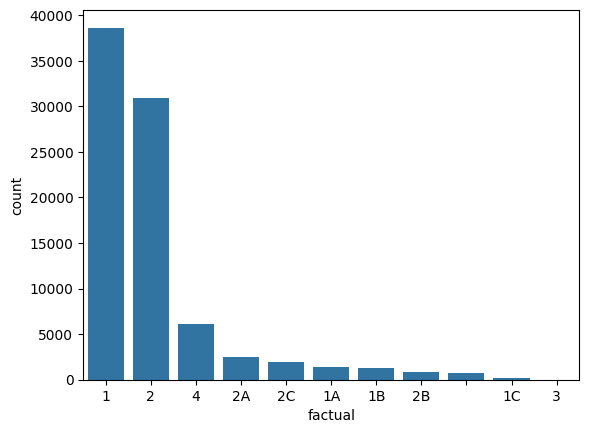

In [118]:
sns.countplot(
    x="factual",
    data = df,
    order = df["factual"].value_counts().index,
)
plt.show()

## Tipo de impuesto en la venta

In [119]:
df['fventa'].value_counts()

fventa
1    41533
2    36726
4     6285
3        4
Name: count, dtype: int64

In [120]:
fv_diccionario = { 1: 'Clase 1',
                   2: 'Clase 2',
                   3: 'Clase 3',
                   4: 'Clase 4'

}
df['fventa'] = df['fventa'].map(fv_diccionario)

In [121]:
df['fventa']

0        Clase 2
1        Clase 2
2        Clase 2
3        Clase 2
4        Clase 2
          ...   
84543    Clase 1
84544    Clase 1
84545    Clase 1
84546    Clase 4
84547    Clase 4
Name: fventa, Length: 84548, dtype: object

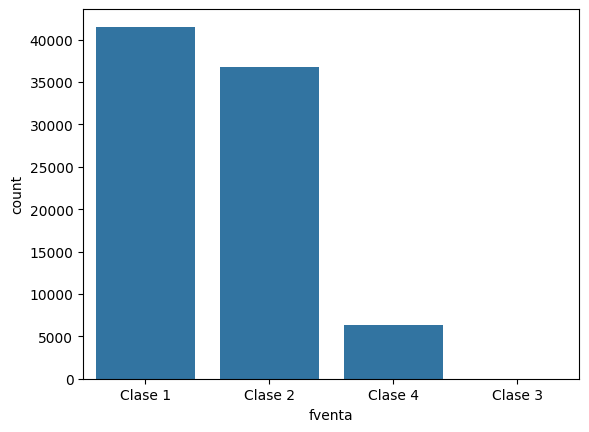

In [122]:
sns.countplot(
    x="fventa",
    data = df,
    order = df["fventa"].value_counts().index,
)
plt.show()

# Imputación

In [123]:
from sklearn import neighbors

In [124]:
len(df[df.isnull().any(axis=1)])/len(df)

0.23655201778871174

In [125]:
codificadas = pd.get_dummies(df[["Barrio","Distrito","eactual","fventa"]])

## Año

In [126]:
con_faltantes_año = df[df["Año"].isnull()]
sin_faltantes_año = df[~df["Año"].isnull()]

In [127]:
sin_faltantes_d_año = codificadas.loc[sin_faltantes_año.index]
con_faltantes_d_año = codificadas.loc[con_faltantes_año.index]

In [128]:
modelo_año = neighbors.KNeighborsClassifier(291)
modelo_año.fit(sin_faltantes_d_año,sin_faltantes_año["Año"])

KNeighborsClassifier(n_neighbors=291)

In [129]:
años_predichos = modelo_año.predict(con_faltantes_d_año)

In [130]:
df.loc[con_faltantes_año.index,"Año"] = años_predichos

## Precio

In [131]:
con_faltantes_precio = df[df["Precio"].isnull()]
sin_faltantes_precio = df[~df["Precio"].isnull()]

In [132]:
con_faltantes_d_precio = codificadas.loc[con_faltantes_precio.index]
sin_faltantes_d_precio = codificadas.loc[sin_faltantes_precio.index]

In [133]:
modelo_precio = neighbors.KNeighborsClassifier(291)
modelo_precio.fit(sin_faltantes_d_precio,sin_faltantes_precio["Precio"])

KNeighborsClassifier(n_neighbors=291)

In [134]:
precios_predichos = modelo_precio.predict(con_faltantes_d_precio)

In [135]:
df.loc[con_faltantes_precio.index,"Precio"] = precios_predichos

## Tipo de edificación

In [136]:
codificadas = pd.get_dummies(df[["Barrio","Distrito","fventa"]])

In [137]:
con_faltantes_ed = df[df["eactual"].isnull()]
sin_faltantes_ed = df[~df["eactual"].isnull()]

In [138]:
sin_faltantes_ed

,Distrito,Barrio,edificio,factual,BLOCK,LOT,EASE-MENT,eactual,ADDRESS,APARTMENT NUMBER,...,LAND SQUARE FEET,GROSS SQUARE FEET,Año,fventa,eventa,Precio,Fecha,Referencia,Año-Mes,Mes
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,FIVE TO SIX FAMILIES,153 AVENUE B,,...,1633,6440,1900.0,Clase 2,FIVE TO SIX FAMILIES,6625000.0,2017-07-19,154,2017-07,2017-07
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,WALK-UP APT. OVER SIX FAMILIES WITH STORES,234 EAST 4TH STREET,,...,4616,18690,1900.0,Clase 2,WALK-UP APT. OVER SIX FAMILIES WITH STORES,10.0,2016-12-14,-63,2016-12,2016-12
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,WALK-UP APT. OVER SIX FAMILIES WITH STORES,197 EAST 3RD STREET,,...,2212,7803,1900.0,Clase 2,WALK-UP APT. OVER SIX FAMILIES WITH STORES,10.0,2016-12-09,-68,2016-12,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,OLD LAW TENEMENT,154 EAST 7TH STREET,,...,2272,6794,1910.0,Clase 2,OLD LAW TENEMENT,3936272.0,2016-09-23,-145,2016-09,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,FIVE TO SIX FAMILIES,301 EAST 10TH STREET,,...,2369,4615,1900.0,Clase 2,FIVE TO SIX FAMILIES,8000000.0,2016-11-17,-90,2016-11,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,MISCELLANEOUS TWO FAMILY,37 QUAIL LANE,,...,2400,2575,1990.0,Clase 1,MISCELLANEOUS TWO FAMILY,450000.0,2016-11-28,-79,2016-11,2016-11
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,MISCELLANEOUS TWO FAMILY,32 PHEASANT LANE,,...,2498,2377,1990.0,Clase 1,MISCELLANEOUS TWO FAMILY,550000.0,2017-04-21,65,2017-04,2017-04
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,TWO FAMILY FRAME,49 PITNEY AVENUE,,...,4000,1496,1920.0,Clase 1,TWO FAMILY FRAME,460000.0,2017-07-05,140,2017-07,2017-07
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,,SHOPPING CENTER WITH OR WITHOUT PARKING,2730 ARTHUR KILL ROAD,,...,208033,64117,2000.0,Clase 4,SHOPPING CENTER WITH OR WITHOUT PARKING,11693337.0,2016-12-21,-56,2016-12,2016-12


In [139]:
con_faltantes_d_ed = codificadas.loc[con_faltantes_ed.index]
sin_faltantes_d_ed = codificadas.loc[sin_faltantes_ed.index]
con_faltantes_d_ed["Año"] = con_faltantes_ed["Año"]
sin_faltantes_d_ed["Año"] = sin_faltantes_ed["Año"]
con_faltantes_d_ed["Precio"] = con_faltantes_ed["Precio"]
sin_faltantes_d_ed["Precio"] = sin_faltantes_ed["Precio"]

In [140]:
modelo_ed = neighbors.KNeighborsClassifier(291)
modelo_ed.fit(sin_faltantes_d_ed,sin_faltantes_ed["eactual"])

KNeighborsClassifier(n_neighbors=291)

In [141]:
eactual_predichos = modelo_ed.predict(con_faltantes_d_ed)

In [142]:
df.loc[con_faltantes_ed.index,"eactual"] = eactual_predichos

## Verificación

In [143]:
df.isnull().sum()

Distrito               0
Barrio                 0
edificio               0
factual                0
BLOCK                  0
LOT                    0
EASE-MENT              0
eactual                0
ADDRESS                0
APARTMENT NUMBER       0
Postal               982
Unidades_res           0
Unidades_com           0
TOTAL UNITS            0
LAND SQUARE FEET       0
GROSS SQUARE FEET      0
Año                    0
fventa                 0
eventa                 0
Precio                 0
Fecha                  0
Referencia             0
Año-Mes                0
Mes                    0
dtype: int64

# Base lista

In [144]:
df = df[["Barrio","Distrito","Año","eactual","fventa","Unidades_res","Unidades_com","Precio","Fecha"]]
df

,Barrio,Distrito,Año,eactual,fventa,Unidades_res,Unidades_com,Precio,Fecha
0,ALPHABET CITY,Manhattan,1900.0,FIVE TO SIX FAMILIES,Clase 2,5,0,6625000.0,2017-07-19
1,ALPHABET CITY,Manhattan,1900.0,WALK-UP APT. OVER SIX FAMILIES WITH STORES,Clase 2,28,3,10.0,2016-12-14
2,ALPHABET CITY,Manhattan,1900.0,WALK-UP APT. OVER SIX FAMILIES WITH STORES,Clase 2,16,1,10.0,2016-12-09
3,ALPHABET CITY,Manhattan,1910.0,OLD LAW TENEMENT,Clase 2,10,0,3936272.0,2016-09-23
4,ALPHABET CITY,Manhattan,1900.0,FIVE TO SIX FAMILIES,Clase 2,6,0,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...
84543,WOODROW,Staten Island,1990.0,MISCELLANEOUS TWO FAMILY,Clase 1,2,0,450000.0,2016-11-28
84544,WOODROW,Staten Island,1990.0,MISCELLANEOUS TWO FAMILY,Clase 1,2,0,550000.0,2017-04-21
84545,WOODROW,Staten Island,1920.0,TWO FAMILY FRAME,Clase 1,2,0,460000.0,2017-07-05
84546,WOODROW,Staten Island,2000.0,SHOPPING CENTER WITH OR WITHOUT PARKING,Clase 4,0,7,11693337.0,2016-12-21


**Nombres de las variables:**

|Nombre original|Nuevo nombre|
|---------------|------------|
|Neigborhood|Barrio|
|Borough|Distrito|
|Year built|Año|
|Building at present|eactual|
|Tax class at sale|fventa|
|Residential units|Unidades_res|
|Commercial units|Unidades_com|
|Sale price|Precio|
|Sale date|Fecha|

# Análisis Bivariado

In [145]:
#@title Funciones de bivariado

def cat_cat(df,variable1,variable2):   # Categórica vs. Categórica
  tabla_cont = pd.crosstab(df[variable1],df[variable2])
  return sp.stats.chi2_contingency(tabla_cont)      # Retorna el estadística, p valor, grados de libertad y valores esperados

## Año de construcción vs. Distrito

In [146]:
bronx = df[df["Distrito"]=="Bronx"]["Año"]
manhattan = df[df["Distrito"]=="Manhattan"]["Año"]
brooklyn = df[df["Distrito"]=="Brooklyn"]["Año"]
queens = df[df["Distrito"]=="Queens"]["Año"]
staten = df[df["Distrito"]=="Staten Island"]["Año"]

In [147]:
sp.stats.kruskal(bronx,manhattan,queens,staten)

KruskalResult(statistic=2985.2894365780217, pvalue=0.0)

In [148]:
manhattan.value_counts().sort_index()

Año
1880.0      40
1890.0     197
1900.0    1448
1910.0    1671
1920.0    2721
1930.0    1495
1940.0     488
1950.0    1202
1960.0    2492
1970.0     838
1980.0    1369
1990.0     139
2000.0    3078
2010.0    1128
Name: count, dtype: int64

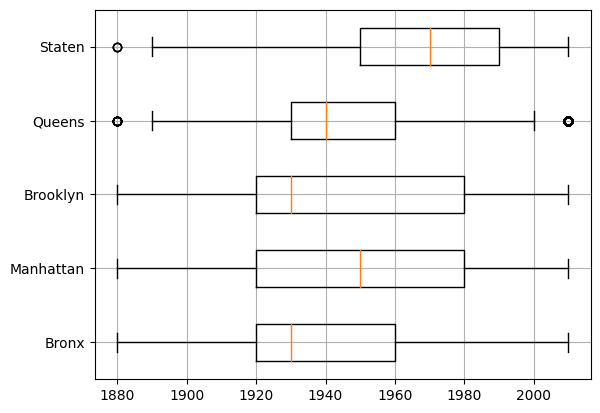

In [149]:
plt.boxplot([bronx,manhattan,brooklyn,queens,staten],labels=["Bronx","Manhattan","Brooklyn","Queens","Staten"],vert=False)
plt.grid()
plt.show()

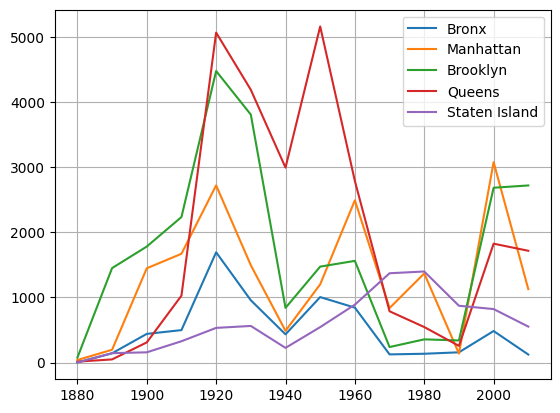

In [150]:
plt.plot(bronx.value_counts().sort_index().index,bronx.value_counts().sort_index().values,label="Bronx")
plt.plot(manhattan.value_counts().sort_index().index,manhattan.value_counts().sort_index().values,label="Manhattan")
plt.plot(brooklyn.value_counts().sort_index().index,brooklyn.value_counts().sort_index().values,label="Brooklyn")
plt.plot(queens.value_counts().sort_index().index,queens.value_counts().sort_index().values,label="Queens")
plt.plot(staten.value_counts().sort_index().index,staten.value_counts().sort_index().values,label="Staten Island")
plt.legend()
plt.grid()

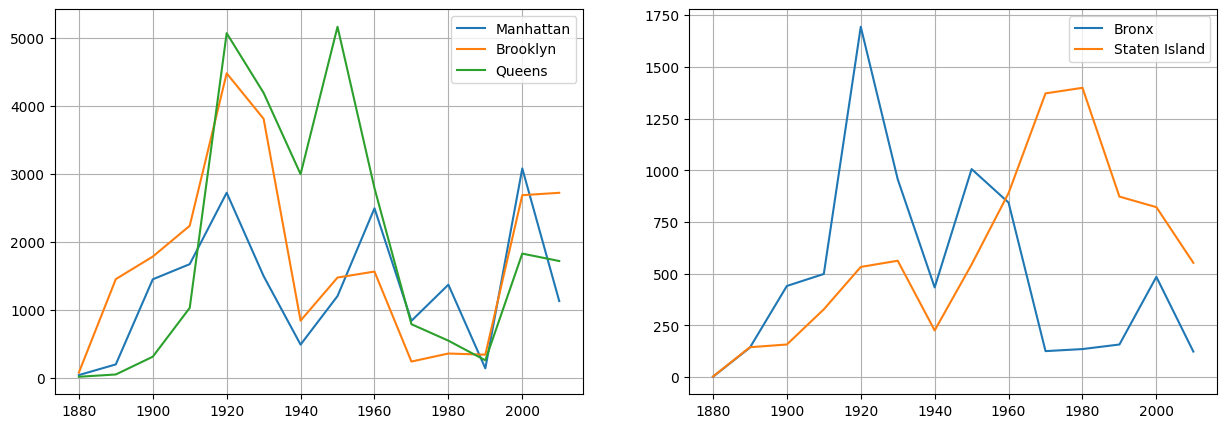

In [151]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[1].plot(bronx.value_counts().sort_index().index,bronx.value_counts().sort_index().values,label="Bronx")
ax[0].plot(manhattan.value_counts().sort_index().index,manhattan.value_counts().sort_index().values,label="Manhattan")
ax[0].plot(brooklyn.value_counts().sort_index().index,brooklyn.value_counts().sort_index().values,label="Brooklyn")
ax[0].plot(queens.value_counts().sort_index().index,queens.value_counts().sort_index().values,label="Queens")
ax[1].plot(staten.value_counts().sort_index().index,staten.value_counts().sort_index().values,label="Staten Island")
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()

## Tipo de construcción vs. Distrito

In [152]:
tabla_contingencia = pd.crosstab(df["Distrito"],df["eactual"])
tabla_contingencia

eactual,ADULT CARE FACILITY,ALL PARKING GARAGES,"AMUSEMENT PLACE, BATH HOUSE, BOAT HOUSE",APARTMENT HOTEL,AUTO BODY/COLLISION OR AUTO REPAIR,BANKING FACILITIES WITH OR WITHOUT PARKING,"BIG BOX RETAIL: NOT AFFIXED & STANDING ON OWN LOT W/PARKING, E.G. COSTCO & BJ'S'","BOUTIQUE: 10-100 ROOMS, W/LUXURY FACILITIES, THEMED, STYLISH, W/FULL SVC ACCOMMODATIONS","BRIDGE, TUNNEL, HIGHWAY",CAPE COD,...,TWO STORIES - DETACHED SM OR MID,UNLICENSED PARKING LOT,WALK-UP APT. OVER SIX FAMILIES WITH STORES,WALK-UP CO-OP; CONVERSION FROM LOFT/WAREHOUSE,WALK-UP COOPERATIVE,WAREHOUSE/FACTORY/INDUSTRIAL,ZONED COMMERCIAL ADJACENT TO CLASS 1 DWELLING: NOT MANHATTAN,ZONED COMMERCIAL OR MANHATTAN RESIDENTIAL,ZONED PRIMARILY RESIDENTIAL; NOT MANHATTAN,ZONED RESIDENTIAL; NOT MANHATTAN
Distrito,,,,,,,,,,,,,,,,,,,,,
Bronx,3,17,0,1,20,0,0,0,2,0,...,505,56,65,0,67,0,0,52,1,231
Brooklyn,2,34,3,0,31,5,1,2,0,1,...,892,127,65,3,534,26,1,127,3,277
Manhattan,1,3,0,1,3,0,0,2,0,0,...,1,8,190,4,813,4,0,85,0,0
Queens,0,41,1,0,39,3,0,0,0,419,...,4067,51,20,0,1290,0,1,101,1,392
Staten Island,1,6,0,0,12,0,0,0,0,49,...,1303,24,1,0,56,0,1,90,4,325


In [153]:
st, p, gl, ex = cat_cat(df,"Distrito","eactual")
p

0.0

In [154]:
df.Distrito.unique()

array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [155]:
bronx = df[df["Distrito"]=="Bronx"]["eactual"].value_counts().head(3)
manhattan = df[df["Distrito"]=="Manhattan"]["eactual"].value_counts().head(3)
brooklyn = df[df["Distrito"]=="Brooklyn"]["eactual"].value_counts().head(3)
queens = df[df["Distrito"]=="Queens"]["eactual"].value_counts().head(3)
staten = df[df["Distrito"]=="Staten Island"]["eactual"].value_counts()

In [156]:
dist,nombres = [bronx,manhattan,brooklyn,queens,staten],["Bronx","Manhattan","Brooklyn","Queens","Staten Island"]

In [157]:
staten

eactual
ONE FAMILY ATTACHED OR SEMI-DETACHED          1954
TWO STORIES - DETACHED SM OR MID              1303
TWO FAMILY FRAME                              1272
ONE STORY - PERMANENT LIVING QUARTER           869
CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.     511
                                              ... 
MOBILE HOMES/TRAILER PARKS                       1
GARDEN APARTMENTS                                1
FIVE TO SIX FAMILIES                             1
PARSONAGE, RECTORY                               1
MISCELLANEOUS INDOOR PUBLIC ASSEMBLY             1
Name: count, Length: 83, dtype: int64

In [158]:
for i in range(len(dist)):
  print(nombres[i],dist[i],"\n")

Bronx eactual
ELEVATOR COOPERATIVE    996
TWO FAMILY BRICK        890
THREE FAMILIES          749
Name: count, dtype: int64 

Manhattan eactual
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.    7487
ELEVATOR COOPERATIVE                         5762
CO-OP WITHIN A CONDOMINIUM                    963
Name: count, dtype: int64 

Brooklyn eactual
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.    2784
TWO FAMILY BRICK                             2273
ELEVATOR COOPERATIVE                         2209
Name: count, dtype: int64 

Queens eactual
TWO STORIES - DETACHED SM OR MID        4067
ELEVATOR COOPERATIVE                    3773
TWO FAMILY CONVERTED FROM ONE FAMILY    2017
Name: count, dtype: int64 

Staten Island eactual
ONE FAMILY ATTACHED OR SEMI-DETACHED          1954
TWO STORIES - DETACHED SM OR MID              1303
TWO FAMILY FRAME                              1272
ONE STORY - PERMANENT LIVING QUARTER           869
CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.     511
                            

## Fecha de venta vs. Distrito

In [159]:
from statsmodels.graphics.tsaplots import plot_acf

In [160]:
bronx = df[df["Distrito"]=="Bronx"]["Fecha"]
manhattan = df[df["Distrito"]=="Manhattan"]["Fecha"]
brooklyn = df[df["Distrito"]=="Brooklyn"]["Fecha"]
queens = df[df["Distrito"]=="Queens"]["Fecha"]
staten = df[df["Distrito"]=="Staten Island"]["Fecha"]

In [161]:
bronx_f=bronx.groupby([bronx.dt.year,bronx.dt.month]).count()
manhattan_f=manhattan.groupby([manhattan.dt.year,manhattan.dt.month]).count()
brooklyn_f=brooklyn.groupby([brooklyn.dt.year,brooklyn.dt.month]).count()
queens_f=queens.groupby([queens.dt.year,queens.dt.month]).count()
staten_f=staten.groupby([staten.dt.year,staten.dt.month]).count()

In [162]:
fechas = ["9-16","10-16","11-16","12-16","1-17","2-17","3-17","4-17","5-17","6-17","7-17","8-17"]

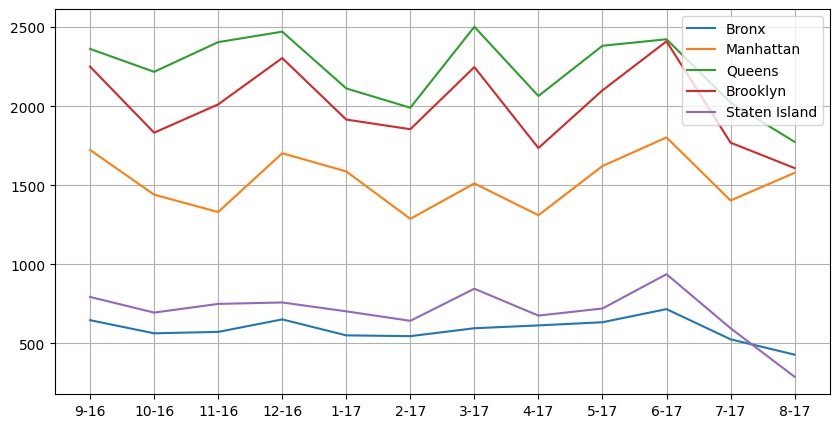

In [163]:
plt.figure(figsize=(10,5))
plt.plot(fechas,bronx_f.values,label="Bronx")
plt.plot(fechas,manhattan_f.values, label="Manhattan")
plt.plot(fechas,queens_f.values, label="Queens")
plt.plot(fechas,brooklyn_f.values, label="Brooklyn")
plt.plot(fechas,staten_f.values, label="Staten Island")
plt.grid()
plt.legend()
plt.show()

In [164]:
df.Distrito.value_counts()

Distrito
Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: count, dtype: int64

In [165]:
dist = [bronx_f,manhattan_f,brooklyn_f,queens_f,staten_f]
nombres = ["Bronx","Manhattan","Brooklyn","Queens","Staten Island"]

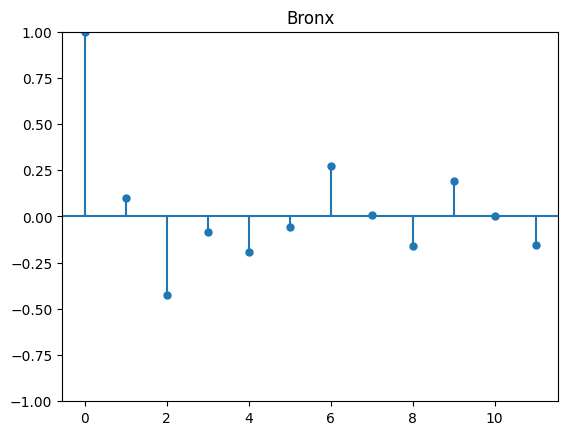

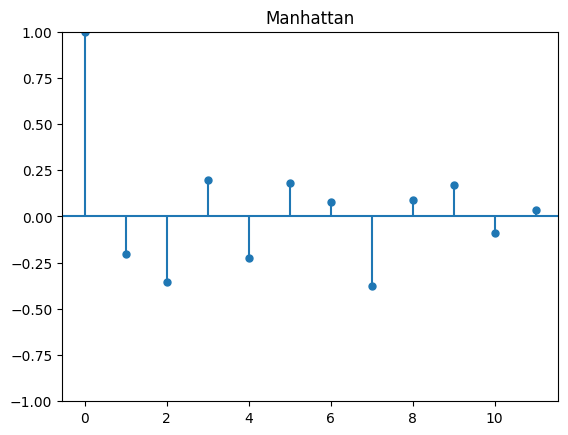

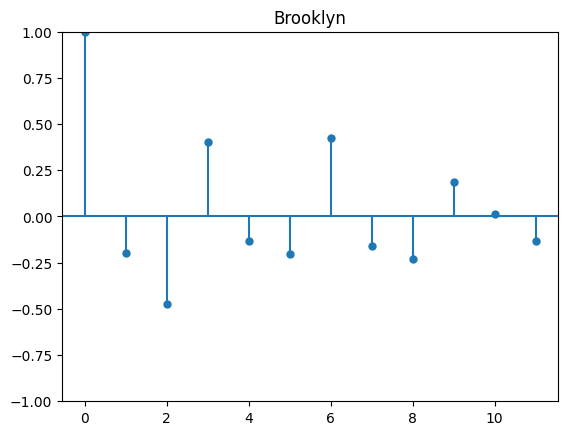

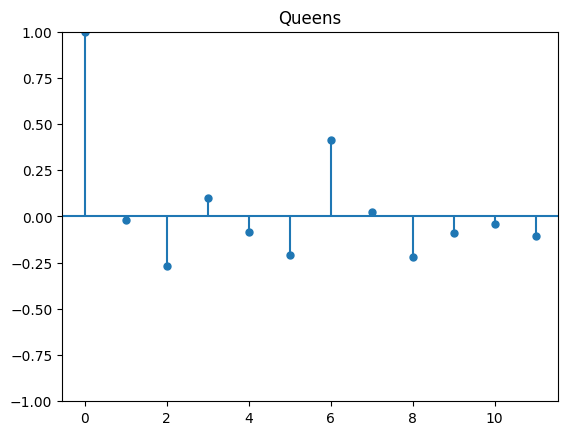

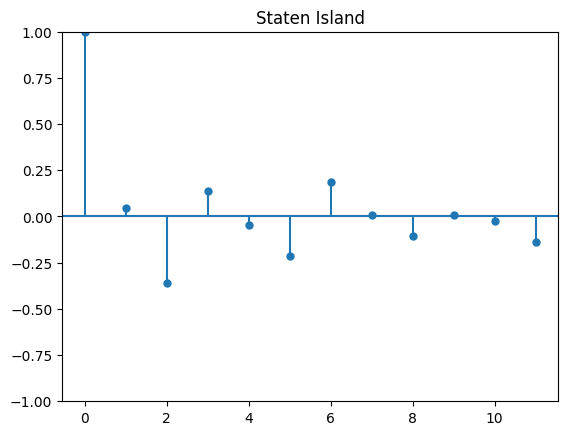

In [166]:
for i in range(len(dist)):
  plot_acf(dist[i],lags=11,alpha=None)
  plt.title(nombres[i])

## Clase Fiscal vs. Distrito

In [167]:
contingencia = pd.crosstab(df["fventa"],df["Distrito"])
contingencia

Distrito,Bronx,Brooklyn,Manhattan,Queens,Staten Island
fventa,,,,,
Clase 1,4404,12665,355,16541,7568
Clase 2,2114,9120,16581,8431,480
Clase 3,2,0,2,0,0
Clase 4,529,2262,1368,1764,362


In [168]:
st,p,gl,ex = cat_cat(df,"fventa","Distrito")
p

0.0

In [169]:
bronx = df[df["Distrito"]=="Bronx"]["fventa"]
manhattan = df[df["Distrito"]=="Manhattan"]["fventa"]
brooklyn = df[df["Distrito"]=="Brooklyn"]["fventa"]
queens = df[df["Distrito"]=="Queens"]["fventa"]
staten = df[df["Distrito"]=="Staten Island"]["fventa"]

In [170]:
dist = [bronx,manhattan,brooklyn,queens,staten]
nombres = ["Bronx","Manhattan","Brooklyn","Queens","Staten Island"]

In [171]:
bronx[bronx=="Clase 1"]

18306    Clase 1
18307    Clase 1
18308    Clase 1
18309    Clase 1
18310    Clase 1
          ...   
25320    Clase 1
25321    Clase 1
25322    Clase 1
25323    Clase 1
25324    Clase 1
Name: fventa, Length: 4404, dtype: object

In [172]:
np.add(np.add([i[i=="Clase 1"].count() for i in dist],[i[i=="Clase 2"].count() for i in dist]),[i[i=="Clase 3"].count() for i in dist])

array([ 6520, 16938, 21785, 24972,  8048])

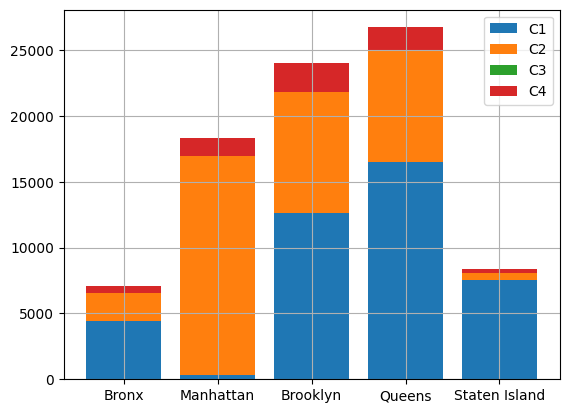

In [173]:
plt.bar(nombres,[i[i=="Clase 1"].count() for i in dist],label="C1")
plt.bar(nombres,[i[i=="Clase 2"].count() for i in dist],bottom = [i[i=="Clase 1"].count() for i in dist],label="C2")
plt.bar(nombres,[i[i=="Clase 3"].count() for i in dist],bottom = np.add([i[i=="Clase 1"].count() for i in dist],[i[i=="Clase 2"].count() for i in dist]),label="C3")
plt.bar(nombres,[i[i=="Clase 4"].count() for i in dist],bottom = np.add(np.add([i[i=="Clase 1"].count() for i in dist],[i[i=="Clase 2"].count() for i in dist]),[i[i=="Clase 3"].count() for i in dist]),label="C4")
plt.grid()
plt.legend()
plt.show()

## Unidades residenciales vs. Distrito

In [174]:
bronx = df[df["Distrito"]=="Bronx"]["Unidades_res"]
manhattan = df[df["Distrito"]=="Manhattan"]["Unidades_res"]
brooklyn = df[df["Distrito"]=="Brooklyn"]["Unidades_res"]
queens = df[df["Distrito"]=="Queens"]["Unidades_res"]
staten = df[df["Distrito"]=="Staten Island"]["Unidades_res"]

In [175]:
sp.stats.kruskal(bronx,manhattan,brooklyn,queens,staten)

KruskalResult(statistic=7910.459973148131, pvalue=0.0)

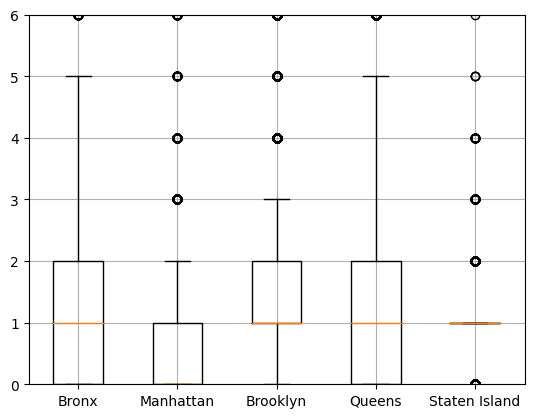

In [176]:
plt.boxplot([bronx,manhattan,brooklyn,queens,staten], labels=["Bronx","Manhattan","Brooklyn","Queens","Staten Island"])
plt.ylim(0,6)
plt.grid()
plt.show()

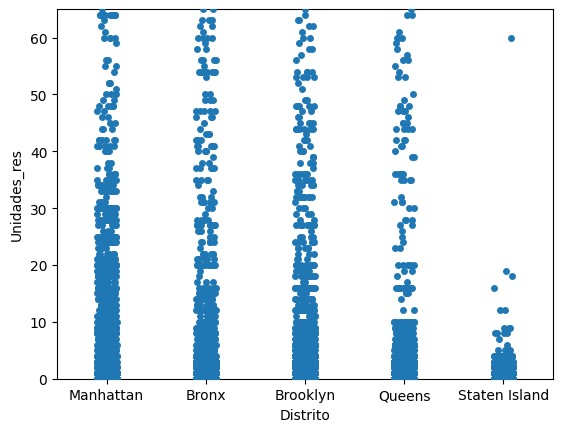

In [177]:
sns.stripplot(x='Distrito', y='Unidades_res', data=df, jitter=True)
plt.ylim(0,65)
plt.show()

## Unidades comerciales vs. Distrito

In [178]:
bronx = df[df["Distrito"]=="Bronx"]["Unidades_com"]
manhattan = df[df["Distrito"]=="Manhattan"]["Unidades_com"]
brooklyn = df[df["Distrito"]=="Brooklyn"]["Unidades_com"]
queens = df[df["Distrito"]=="Queens"]["Unidades_com"]
staten = df[df["Distrito"]=="Staten Island"]["Unidades_com"]

In [179]:
sp.stats.kruskal(bronx,manhattan,brooklyn,queens,staten)

KruskalResult(statistic=587.8907993497054, pvalue=6.46958714465184e-126)

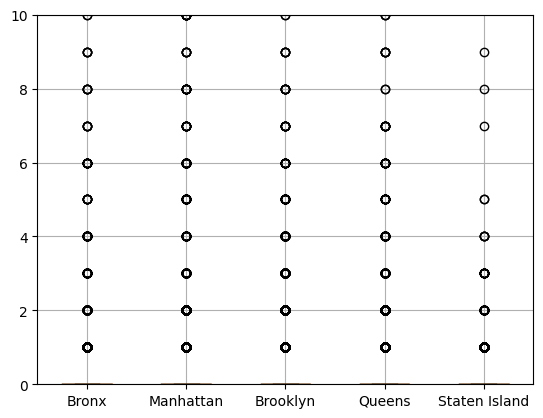

In [180]:
plt.boxplot([bronx,manhattan,brooklyn,queens,staten], labels=["Bronx","Manhattan","Brooklyn","Queens","Staten Island"])
plt.ylim(0,10)
plt.grid()
plt.show()

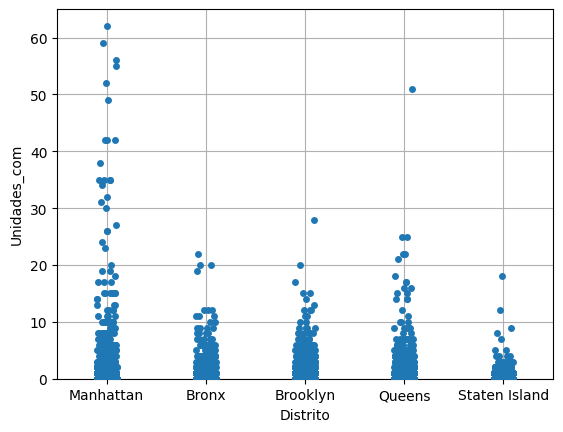

In [181]:
sns.stripplot(x='Distrito', y='Unidades_com', data=df, jitter=True)
plt.ylim(0,65)
plt.grid()
plt.show()

##Año de construcción vs. Tipo de construcción

In [182]:
interes = ['Año', 'eactual']
año_cons = df[interes]
año_cons

,Año,eactual
0,1900.0,FIVE TO SIX FAMILIES
1,1900.0,WALK-UP APT. OVER SIX FAMILIES WITH STORES
2,1900.0,WALK-UP APT. OVER SIX FAMILIES WITH STORES
3,1910.0,OLD LAW TENEMENT
4,1900.0,FIVE TO SIX FAMILIES
...,...,...
84543,1990.0,MISCELLANEOUS TWO FAMILY
84544,1990.0,MISCELLANEOUS TWO FAMILY
84545,1920.0,TWO FAMILY FRAME
84546,2000.0,SHOPPING CENTER WITH OR WITHOUT PARKING


In [183]:
# Realizar la prueba de Kruskal-Wallis
result_kruskal = sp.stats.kruskal(*[año_cons[año_cons['eactual'] == cat]['Año'] for cat in año_cons['eactual'].unique()])
print("Prueba de Kruskal-Wallis:")
print("Estadística de prueba:", result_kruskal.statistic)
print("Valor p:", result_kruskal.pvalue)

Prueba de Kruskal-Wallis:
Estadística de prueba: 25521.486242005372
Valor p: 0.0


In [184]:
df_filtered = año_cons[(año_cons['Año'] >= 1870) & (año_cons['Año'] <= 1900)]
print(df_filtered)

          Año                                     eactual
0      1900.0                        FIVE TO SIX FAMILIES
1      1900.0  WALK-UP APT. OVER SIX FAMILIES WITH STORES
2      1900.0  WALK-UP APT. OVER SIX FAMILIES WITH STORES
4      1900.0                        FIVE TO SIX FAMILIES
5      1900.0                            OLD LAW TENEMENT
...       ...                                         ...
84017  1900.0            TWO STORIES - DETACHED SM OR MID
84082  1900.0        TWO FAMILY CONVERTED FROM ONE FAMILY
84084  1900.0                            TWO FAMILY FRAME
84087  1900.0                            TWO FAMILY FRAME
84096  1890.0        TWO FAMILY CONVERTED FROM ONE FAMILY

[6261 rows x 2 columns]


In [185]:
df_filtered['eactual'].mode()

0    THREE FAMILIES
Name: eactual, dtype: object

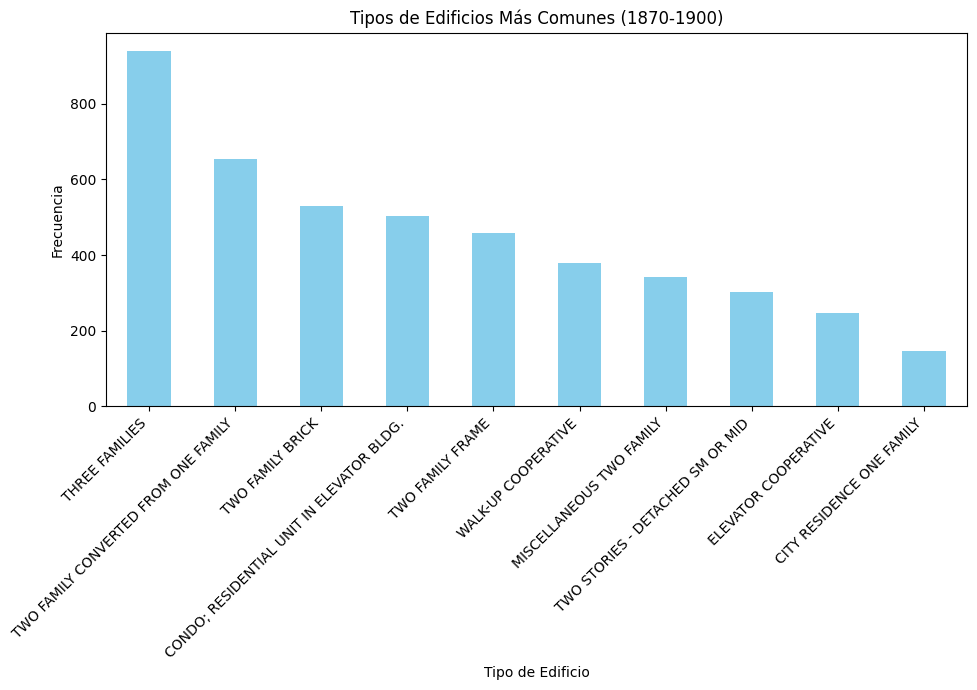

In [186]:
# Filtrar el DataFrame para incluir solo los años desde 1870 hasta 1900
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1870) & (año_cons['Año'] <= 1900)]

# Encontrar los 16 tipos de edificios más comunes
top_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(10)

# Graficar los tipos de edificios más comunes
plt.figure(figsize=(10,7))
top_edificios.plot(kind='bar', color='skyblue')
plt.title('Tipos de Edificios Más Comunes (1870-1900)')
plt.xlabel('Tipo de Edificio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



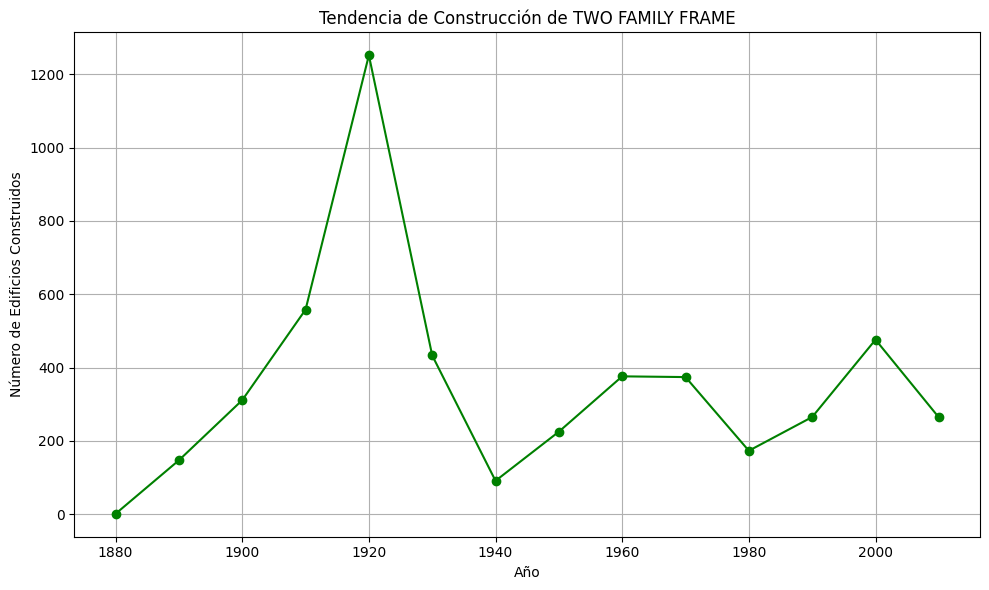

In [187]:
# Filtrar el DataFrame para incluir solo un tipo específico de edificio
tipo_edificio = "TWO FAMILY FRAME"  # Tipo de edificio que quieres analizar
df_tipo_edificio = año_cons[año_cons['eactual'] == tipo_edificio]

# Agrupar por año y contar el número de edificios de ese tipo construidos en cada año
conteo_por_año = df_tipo_edificio.groupby('Año').size()

# Graficar la tendencia a lo largo de los años
plt.figure(figsize=(10, 6))
conteo_por_año.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Construcción de {}'.format(tipo_edificio))
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [188]:
top_10_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(10).index
top_10_edificios

Index(['THREE FAMILIES', 'TWO FAMILY CONVERTED FROM ONE FAMILY',
       'TWO FAMILY BRICK', 'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
       'TWO FAMILY FRAME', 'WALK-UP COOPERATIVE', 'MISCELLANEOUS TWO FAMILY',
       'TWO STORIES - DETACHED SM OR MID', 'ELEVATOR COOPERATIVE',
       'CITY RESIDENCE ONE FAMILY'],
      dtype='object', name='eactual')

In [189]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1870) & (año_cons['Año'] <= 1910)]
top_1910 = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
top_1910

Index(['THREE FAMILIES', 'TWO FAMILY CONVERTED FROM ONE FAMILY',
       'TWO FAMILY FRAME', 'TWO FAMILY BRICK',
       'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.'],
      dtype='object', name='eactual')

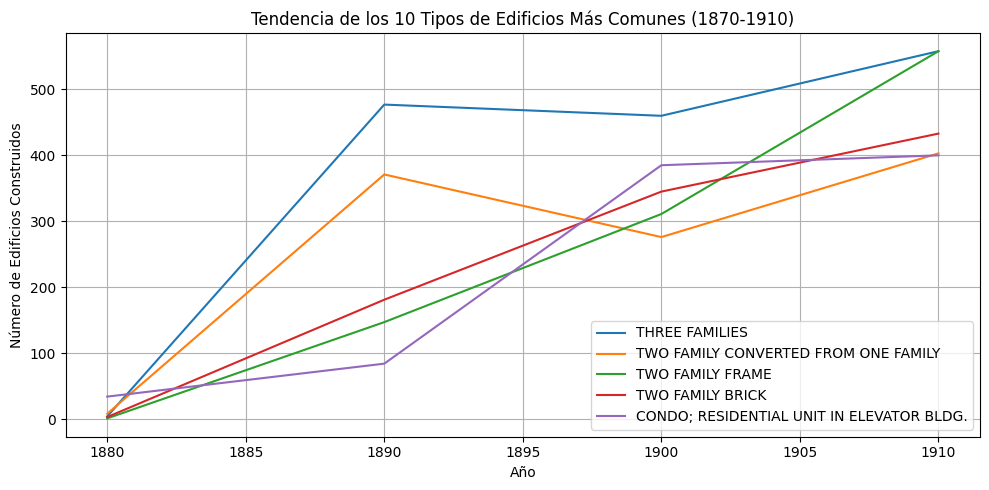

In [190]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1870) & (año_cons['Año'] <= 1910)]
top_10_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
df_top_10_edificios = año_cons_filtrado[año_cons_filtrado['eactual'].isin(top_10_edificios)]
conteo_por_año_tipo_edificio = df_top_10_edificios.groupby(['Año', 'eactual']).size().unstack()
plt.figure(figsize=(10, 5))
for edificio in top_10_edificios:
    plt.plot(conteo_por_año_tipo_edificio.index, conteo_por_año_tipo_edificio[edificio], label=edificio)

plt.title('Tendencia de los 10 Tipos de Edificios Más Comunes (1870-1910)')
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [191]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1910) & (año_cons['Año'] <= 1950)]
top_1950 = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
top_1950

Index(['ELEVATOR COOPERATIVE', 'TWO STORIES - DETACHED SM OR MID',
       'TWO FAMILY CONVERTED FROM ONE FAMILY', 'TWO FAMILY BRICK',
       'ONE FAMILY ATTACHED OR SEMI-DETACHED'],
      dtype='object', name='eactual')

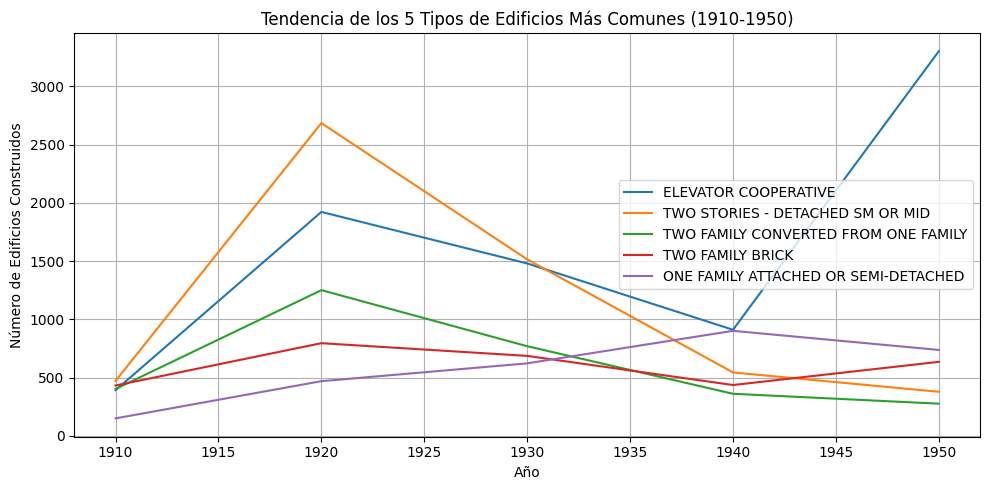

In [192]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1910) & (año_cons['Año'] <= 1950)]
top_10_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
df_top_10_edificios = año_cons_filtrado[año_cons_filtrado['eactual'].isin(top_10_edificios)]
conteo_por_año_tipo_edificio = df_top_10_edificios.groupby(['Año', 'eactual']).size().unstack()
plt.figure(figsize=(10, 5))
for edificio in top_10_edificios:
    plt.plot(conteo_por_año_tipo_edificio.index, conteo_por_año_tipo_edificio[edificio], label=edificio)

plt.title('Tendencia de los 5 Tipos de Edificios Más Comunes (1910-1950)')
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [193]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1950) & (año_cons['Año'] <= 2000)]
top_2000 = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
top_2000

Index(['ELEVATOR COOPERATIVE', 'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
       'ONE FAMILY ATTACHED OR SEMI-DETACHED', 'TWO FAMILY FRAME',
       'TWO FAMILY BRICK'],
      dtype='object', name='eactual')

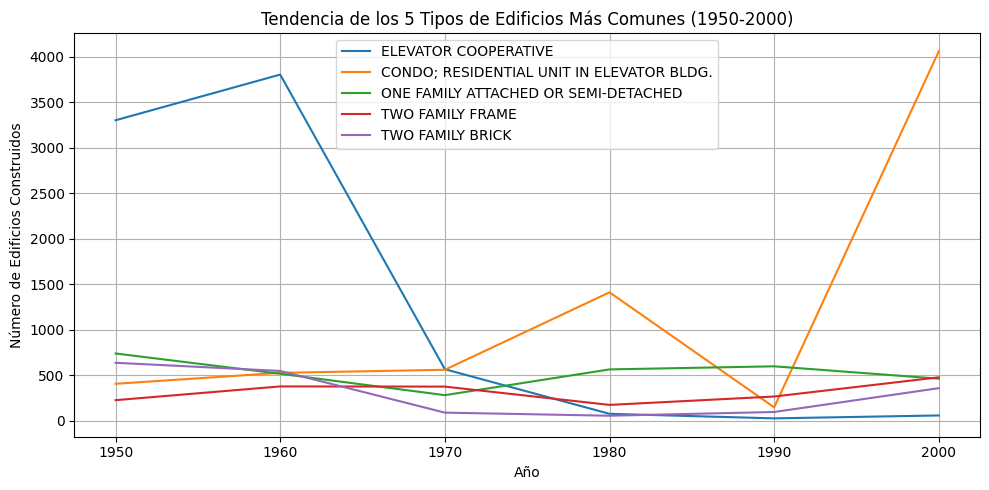

In [194]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1950) & (año_cons['Año'] <= 2000)]
top_10_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
df_top_10_edificios = año_cons_filtrado[año_cons_filtrado['eactual'].isin(top_10_edificios)]
conteo_por_año_tipo_edificio = df_top_10_edificios.groupby(['Año', 'eactual']).size().unstack()
plt.figure(figsize=(10, 5))
for edificio in top_10_edificios:
    plt.plot(conteo_por_año_tipo_edificio.index, conteo_por_año_tipo_edificio[edificio], label=edificio)

plt.title('Tendencia de los 5 Tipos de Edificios Más Comunes (1950-2000)')
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [195]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1970) & (año_cons['Año'] <= 2010)]
top_2010 = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
top_2010

Index(['CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
       'ONE FAMILY ATTACHED OR SEMI-DETACHED', 'TWO FAMILY FRAME',
       'CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.', 'THREE FAMILIES'],
      dtype='object', name='eactual')

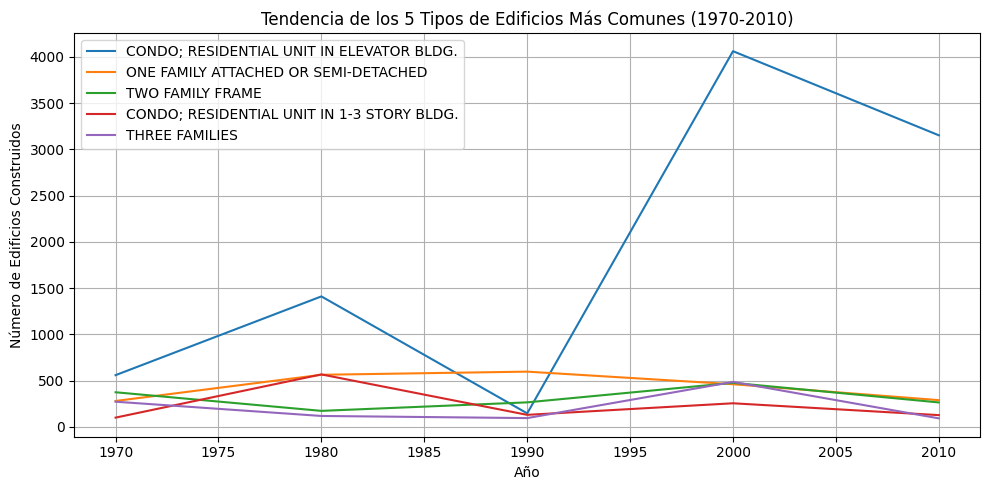

In [196]:
año_cons_filtrado = año_cons[(año_cons['Año'] >= 1970) & (año_cons['Año'] <= 2010)]
top_10_edificios = año_cons_filtrado['eactual'].value_counts().nlargest(5).index
df_top_10_edificios = año_cons_filtrado[año_cons_filtrado['eactual'].isin(top_10_edificios)]
conteo_por_año_tipo_edificio = df_top_10_edificios.groupby(['Año', 'eactual']).size().unstack()
plt.figure(figsize=(10, 5))
for edificio in top_10_edificios:
    plt.plot(conteo_por_año_tipo_edificio.index, conteo_por_año_tipo_edificio[edificio], label=edificio)

plt.title('Tendencia de los 5 Tipos de Edificios Más Comunes (1970-2010)')
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [197]:
to = top_1910 + top_1950 + top_2000 + top_2010
to

Index(['THREE FAMILIESELEVATOR COOPERATIVEELEVATOR COOPERATIVECONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.',
       'TWO FAMILY CONVERTED FROM ONE FAMILYTWO STORIES - DETACHED SM OR MIDCONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.ONE FAMILY ATTACHED OR SEMI-DETACHED',
       'TWO FAMILY FRAMETWO FAMILY CONVERTED FROM ONE FAMILYONE FAMILY ATTACHED OR SEMI-DETACHEDTWO FAMILY FRAME',
       'TWO FAMILY BRICKTWO FAMILY BRICKTWO FAMILY FRAMECONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG.',
       'CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.ONE FAMILY ATTACHED OR SEMI-DETACHEDTWO FAMILY BRICKTHREE FAMILIES'],
      dtype='object', name='eactual')

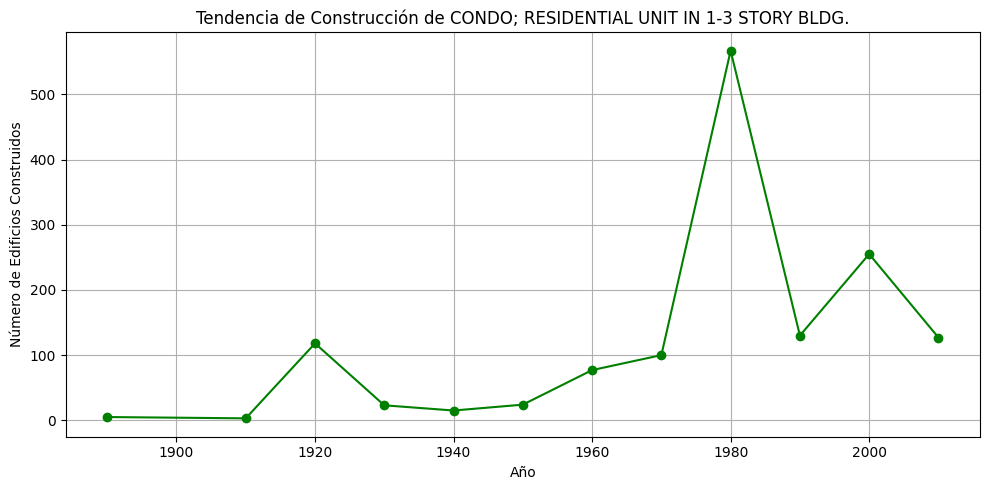

In [198]:
tipo_edificio = "CONDO; RESIDENTIAL UNIT IN 1-3 STORY BLDG."  # Tipo de edificio que quieres analizar
df_tipo_edificio = año_cons[año_cons['eactual'] == tipo_edificio]

# Agrupar por año y contar el número de edificios de ese tipo construidos en cada año
conteo_por_año = df_tipo_edificio.groupby('Año').size()

# Graficar la tendencia a lo largo de los años
plt.figure(figsize=(10, 5))
conteo_por_año.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Construcción de {}'.format(tipo_edificio))
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.grid(True)
plt.tight_layout()
plt.show()

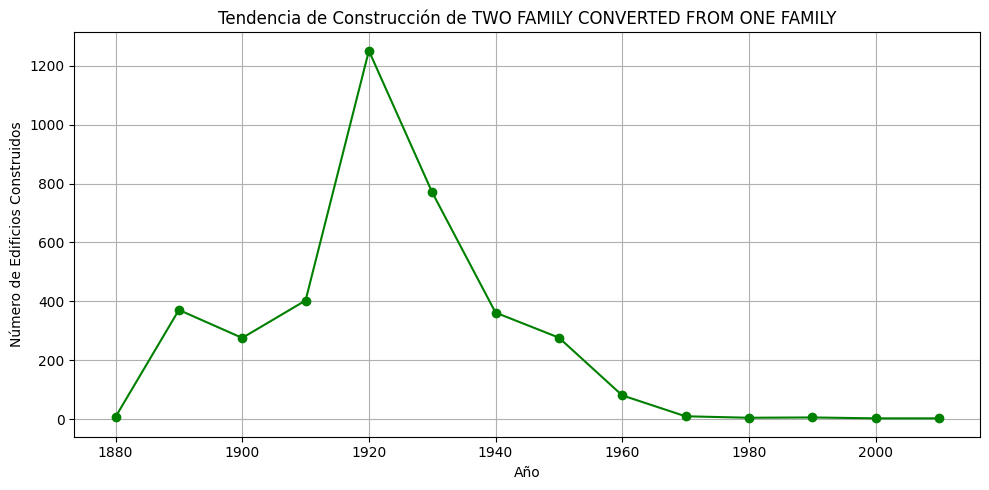

In [199]:
tipo_edificio = "TWO FAMILY CONVERTED FROM ONE FAMILY"  # Tipo de edificio que quieres analizar
df_tipo_edificio = año_cons[año_cons['eactual'] == tipo_edificio]

# Agrupar por año y contar el número de edificios de ese tipo construidos en cada año
conteo_por_año = df_tipo_edificio.groupby('Año').size()

# Graficar la tendencia a lo largo de los años
plt.figure(figsize=(10, 5))
conteo_por_año.plot(kind='line', marker='o', color='green')
plt.title('Tendencia de Construcción de {}'.format(tipo_edificio))
plt.xlabel('Año')
plt.ylabel('Número de Edificios Construidos')
plt.grid(True)
plt.tight_layout()
plt.show()

## Año de construcción vs. Fecha de venta

In [200]:
interes =['Año', 'Fecha']

In [201]:
# Crear una matriz de contingencia (tabla de frecuencias)
# Aquí tienes un ejemplo básico, puedes reemplazar estos datos con los tuyos
observed = np.array([[10, 20, 30],
                     [6,  9,  17]])

# Realizar la prueba de chi-cuadrado de independencia
chi2, p, dof, expected = sp.stats.chi2_contingency(observed)

# Imprimir los resultados
print("Estadística de chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


Estadística de chi-cuadrado: 0.27157465150403504
Valor p: 0.873028283380073
Grados de libertad: 2
Frecuencias esperadas:
 [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


In [202]:
dos = df[interes]
dos

,Año,Fecha
0,1900.0,2017-07-19
1,1900.0,2016-12-14
2,1900.0,2016-12-09
3,1910.0,2016-09-23
4,1900.0,2016-11-17
...,...,...
84543,1990.0,2016-11-28
84544,1990.0,2017-04-21
84545,1920.0,2017-07-05
84546,2000.0,2016-12-21


In [203]:
dos['Fecha'] = pd.to_datetime(dos['Fecha'])
dos['Año_Fecha'] = dos['Fecha'].dt.year
dos

<ipython-input-203-8825556586ef>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-203-8825556586ef>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Año,Fecha,Año_Fecha
0,1900.0,2017-07-19,2017
1,1900.0,2016-12-14,2016
2,1900.0,2016-12-09,2016
3,1910.0,2016-09-23,2016
4,1900.0,2016-11-17,2016
...,...,...,...
84543,1990.0,2016-11-28,2016
84544,1990.0,2017-04-21,2017
84545,1920.0,2017-07-05,2017
84546,2000.0,2016-12-21,2016


In [204]:
# Crear una matriz de contingencia (tabla de frecuencias)
# Aquí tienes un ejemplo básico, puedes reemplazar estos datos con los tuyos
observed = pd.crosstab(dos["Año"], dos["Año_Fecha"])

# Realizar la prueba de chi-cuadrado de independencia
chi2, p, dof, expected = sp.stats.chi2_contingency(observed)

# Imprimir los resultados
print("Estadística de chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)
print("Frecuencias esperadas:\n", expected)


Estadística de chi-cuadrado: 51.2661832145992
Valor p: 1.805198924825476e-06
Grados de libertad: 13
Frecuencias esperadas:
 [[  47.78990633   89.21009367]
 [ 692.43039457 1292.56960543]
 [1443.81330132 2695.18669868]
 [2009.6178857  3751.3821143 ]
 [5055.2651275  9436.7348725 ]
 [3841.33174055 7170.66825945]
 [1737.87819937 3244.12180063]
 [3274.82949331 6113.17050669]
 [2991.92720112 5585.07279888]
 [1173.12010929 2189.87989071]
 [1328.00126555 2478.99873445]
 [ 616.38514217 1150.61485783]
 [3103.20442825 5792.79557175]
 [2177.40580499 4064.59419501]]


In [205]:
observed

Año_Fecha,2016,2017
Año,,
1880.0,40,97
1890.0,669,1316
1900.0,1442,2697
1910.0,1926,3835
1920.0,5035,9457
1930.0,3978,7034
1940.0,1750,3232
1950.0,3338,6050
1960.0,3002,5575


In [206]:
dos[['Año', 'Año_Fecha']]

,Año,Año_Fecha
0,1900.0,2017
1,1900.0,2016
2,1900.0,2016
3,1910.0,2016
4,1900.0,2016
...,...,...
84543,1990.0,2016
84544,1990.0,2017
84545,1920.0,2017
84546,2000.0,2016


## Unidades residenciales vs Tipo de construccion

In [207]:
interes = ['Unidades_res', 'eactual']
tres = df[interes]
tres

,Unidades_res,eactual
0,5,FIVE TO SIX FAMILIES
1,28,WALK-UP APT. OVER SIX FAMILIES WITH STORES
2,16,WALK-UP APT. OVER SIX FAMILIES WITH STORES
3,10,OLD LAW TENEMENT
4,6,FIVE TO SIX FAMILIES
...,...,...
84543,2,MISCELLANEOUS TWO FAMILY
84544,2,MISCELLANEOUS TWO FAMILY
84545,2,TWO FAMILY FRAME
84546,0,SHOPPING CENTER WITH OR WITHOUT PARKING


In [208]:
result = sp.stats.kruskal(*[tres[tres['eactual'] == tipo]['Unidades_res'] for tipo in tres['eactual'].unique()])

print("Estadística de la prueba de Kruskal-Wallis:", result.statistic)
print("Valor p:", result.pvalue)

Estadística de la prueba de Kruskal-Wallis: 81672.7257619735
Valor p: 0.0


In [209]:
tres['eactual'].values

array(['FIVE TO SIX FAMILIES',
       'WALK-UP APT. OVER SIX FAMILIES WITH STORES',
       'WALK-UP APT. OVER SIX FAMILIES WITH STORES', ...,
       'TWO FAMILY FRAME', 'SHOPPING CENTER WITH OR WITHOUT PARKING',
       'MISCELLANEOUS INDOOR PUBLIC ASSEMBLY'], dtype=object)

In [210]:
tres['eactual'].value_counts().head(5)

eactual
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.    12887
ELEVATOR COOPERATIVE                         12790
TWO STORIES - DETACHED SM OR MID              6768
ONE FAMILY ATTACHED OR SEMI-DETACHED          5713
TWO FAMILY FRAME                              4946
Name: count, dtype: int64

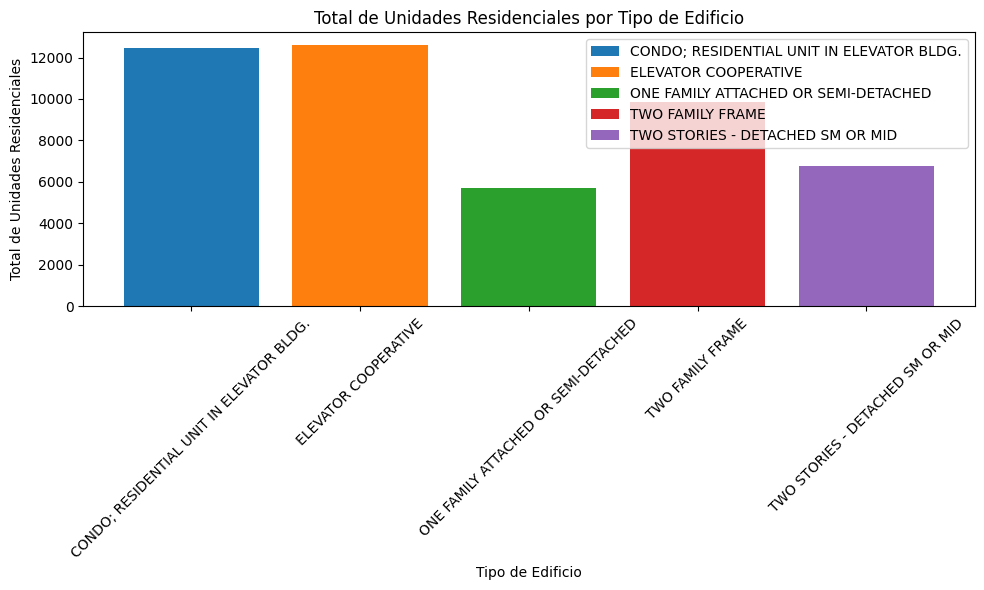

In [211]:
# Encontrar las categorías más frecuentes
top_categories = tres['eactual'].value_counts().head(5).index.tolist()

# Filtrar el DataFrame para incluir solo las categorías más frecuentes
filtered_df = tres[tres['eactual'].isin(top_categories)]

# Graficar
plt.figure(figsize=(10, 6))
for category, group in filtered_df.groupby('eactual'):
    plt.bar(category, group['Unidades_res'].sum(), label=category)

plt.xlabel('Tipo de Edificio')
plt.ylabel('Total de Unidades Residenciales')
plt.title('Total de Unidades Residenciales por Tipo de Edificio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [212]:
tres.groupby('eactual')['Unidades_res'].sum().sort_values(ascending=False).head()

eactual
OVER SIX FAMILIES WITHOUT STORES             17239
THREE FAMILIES                               13137
ELEVATOR COOPERATIVE                         12586
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.    12482
TWO FAMILY FRAME                              9846
Name: Unidades_res, dtype: int64

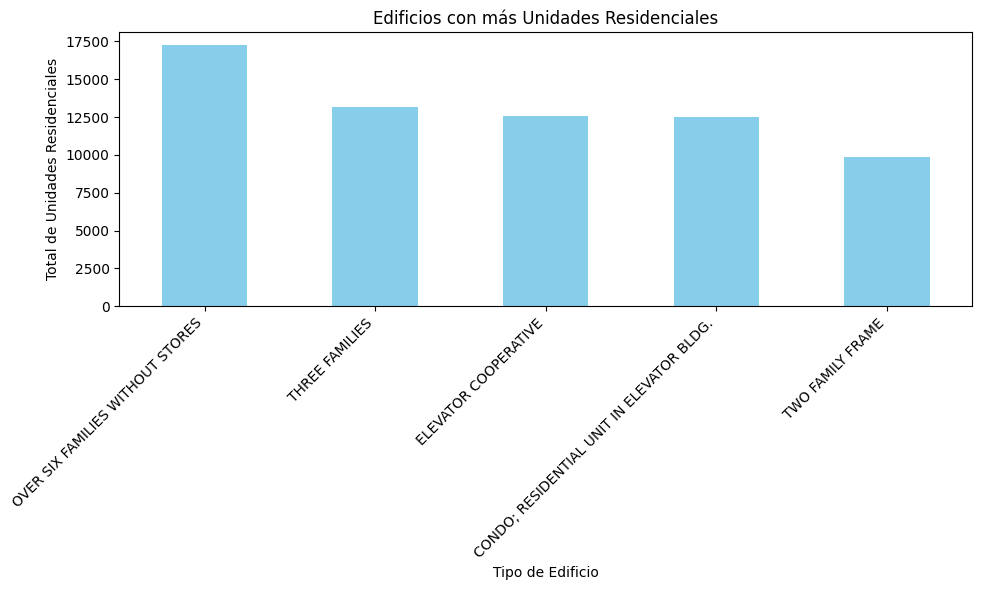

In [213]:
edificios_mas_unidades = tres.groupby('eactual')['Unidades_res'].sum().sort_values(ascending=False).head()

# Graficar
plt.figure(figsize=(10, 6))
edificios_mas_unidades.plot(kind='bar', color='skyblue')
plt.title('Edificios con más Unidades Residenciales')
plt.xlabel('Tipo de Edificio')
plt.ylabel('Total de Unidades Residenciales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Unidades comerciales vs. Tipo de construcción

In [214]:
interes = ['Unidades_com', 'eactual']
cua = df[interes]
cua

,Unidades_com,eactual
0,0,FIVE TO SIX FAMILIES
1,3,WALK-UP APT. OVER SIX FAMILIES WITH STORES
2,1,WALK-UP APT. OVER SIX FAMILIES WITH STORES
3,0,OLD LAW TENEMENT
4,0,FIVE TO SIX FAMILIES
...,...,...
84543,0,MISCELLANEOUS TWO FAMILY
84544,0,MISCELLANEOUS TWO FAMILY
84545,0,TWO FAMILY FRAME
84546,7,SHOPPING CENTER WITH OR WITHOUT PARKING


In [215]:
result = sp.stats.kruskal(*[cua[cua['eactual'] == tipo]['Unidades_com'] for tipo in cua['eactual'].unique()])

print("Estadística de la prueba de Kruskal-Wallis:", result.statistic)
print("Valor p:", result.pvalue)

Estadística de la prueba de Kruskal-Wallis: 80699.78165487392
Valor p: 0.0


Las variables son dependientes p valor 0

In [216]:
cua['eactual'].value_counts().head(5)

eactual
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.    12887
ELEVATOR COOPERATIVE                         12790
TWO STORIES - DETACHED SM OR MID              6768
ONE FAMILY ATTACHED OR SEMI-DETACHED          5713
TWO FAMILY FRAME                              4946
Name: count, dtype: int64

In [217]:
cua['Unidades_com'].value_counts().head(5)

Unidades_com
0    79429
1     3558
2      817
3      259
4      137
Name: count, dtype: int64

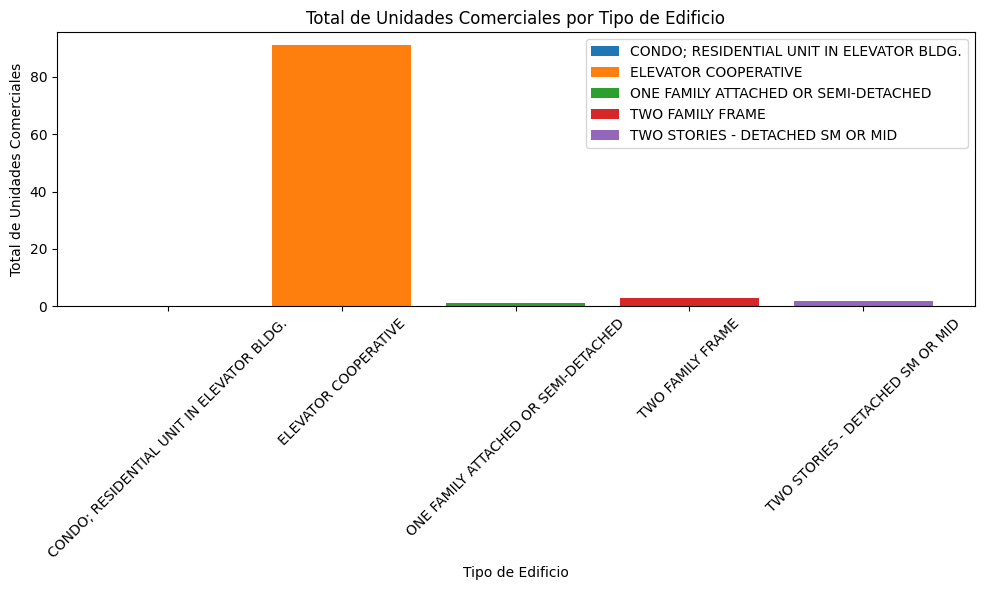

In [218]:
# Encontrar las categorías más frecuentes
top_categories = cua['eactual'].value_counts().head(5).index.tolist()

# Filtrar el DataFrame para incluir solo las categorías más frecuentes
filtered_df = cua[cua['eactual'].isin(top_categories)]

# Graficar
plt.figure(figsize=(10, 6))
for category, group in filtered_df.groupby('eactual'):
    plt.bar(category, group['Unidades_com'].sum(), label=category)

plt.xlabel('Tipo de Edificio')
plt.ylabel('Total de Unidades Comerciales')
plt.title('Total de Unidades Comerciales por Tipo de Edificio')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [219]:
cua.groupby('eactual')['Unidades_com'].sum().sort_values(ascending=False).head()

eactual
MISCELLANEOUS EDUCATIONAL FACILITY                      2285
LIMITED SERVICE; MANY AFFILIATED WITH NATIONAL CHAIN    1130
DORMITORY                                               1025
LUXURY HOTEL                                             855
ONE STORY RETAIL BUILDING                                843
Name: Unidades_com, dtype: int64

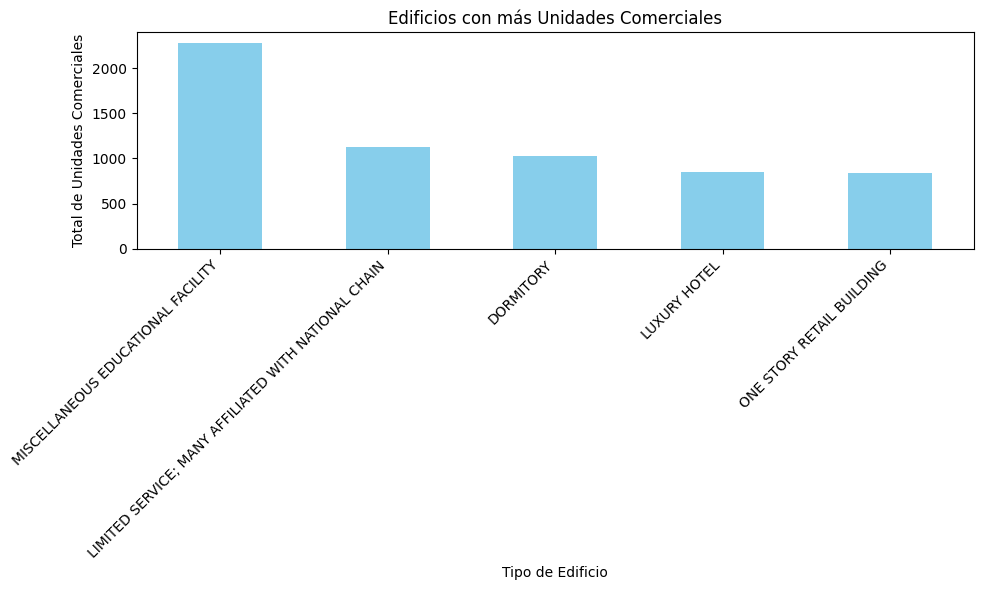

In [220]:
edificios_mas_unidades = cua.groupby('eactual')['Unidades_com'].sum().sort_values(ascending=False).head()

# Graficar
plt.figure(figsize=(10, 6))
edificios_mas_unidades.plot(kind='bar', color='skyblue')
plt.title('Edificios con más Unidades Comerciales')
plt.xlabel('Tipo de Edificio')
plt.ylabel('Total de Unidades Comerciales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Clase fiscal vs. Tipo de construcción

In [221]:
interes = ['fventa', 'eactual']
cin = df[interes]
cin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fventa   84548 non-null  object
 1   eactual  84548 non-null  object
dtypes: object(2)
memory usage: 1.3+ MB


In [222]:
contingency_table = pd.crosstab(cin['fventa'], cin['eactual'])

# Realizar la prueba de chi-cuadrado
chi2, p, dof, expected = sp.stats.chi2_contingency(contingency_table)

# Imprimir los resultados
print("Chi-cuadrado:", chi2)
print("Valor p:", p)
print("Grados de libertad:", dof)


Chi-cuadrado: 251952.17937313055
Valor p: 0.0
Grados de libertad: 495


Dependientes con chi cuadrado de independendencia = 0

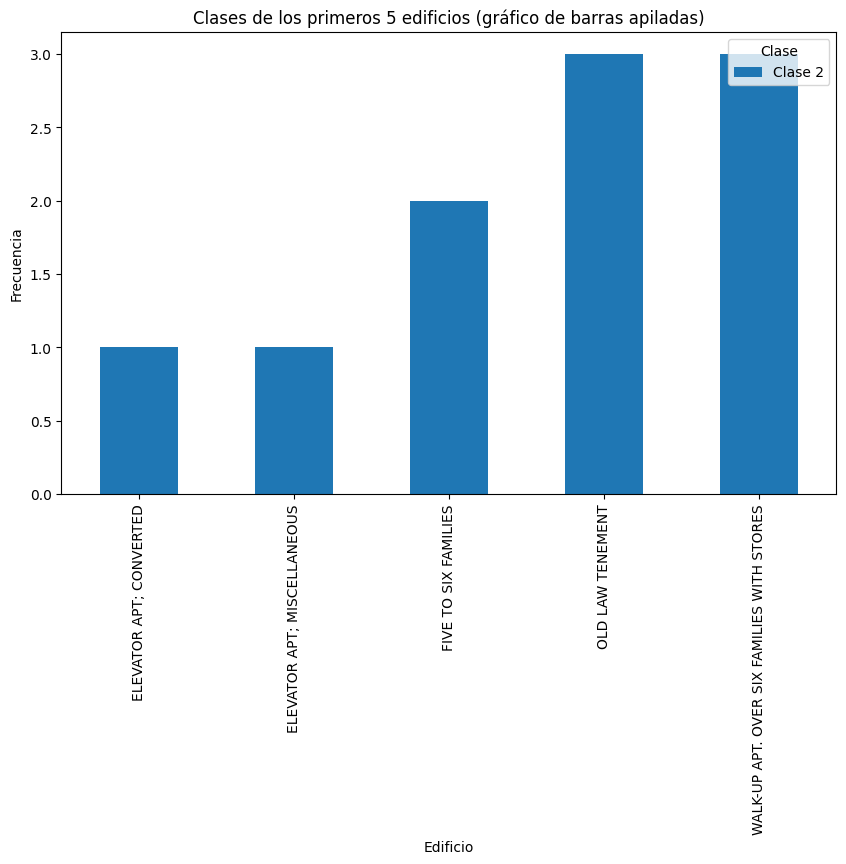

In [223]:
# Seleccionar los primeros 5 edificios
primeros_5_edificios = cin['eactual'].head(10)

# Seleccionar las clases correspondientes a los primeros 5 edificios
clases_primeros_5 = cin.loc[cin['eactual'].isin(primeros_5_edificios), 'fventa']

# Crear una tabla de contingencia entre los edificios y las clases
contingency_table = pd.crosstab(primeros_5_edificios, clases_primeros_5)

# Graficar un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Edificio')
plt.ylabel('Frecuencia')
plt.title('Clases de los primeros 5 edificios (gráfico de barras apiladas)')
plt.legend(title='Clase', loc='upper right')
plt.show()


## Unidades comerciales vs. Unidades residenciales

In [224]:
interes = ['Unidades_res', 'Unidades_com']
seis = df[interes]
seis

,Unidades_res,Unidades_com
0,5,0
1,28,3
2,16,1
3,10,0
4,6,0
...,...,...
84543,2,0
84544,2,0
84545,2,0
84546,0,7


In [225]:
spearman_corr = seis['Unidades_res'].corr(seis['Unidades_com'], method='spearman')

# Correlación de Kendall
kendall_corr = seis['Unidades_res'].corr(df['Unidades_com'], method='kendall')

print("Correlación de Spearman:", spearman_corr)
print("Correlación de Kendall:", kendall_corr)

Correlación de Spearman: 7.85417440704879e-05
Correlación de Kendall: 0.0004684400767897296


In [226]:
from scipy.stats import linregress

# Regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(seis['Unidades_res'], seis['Unidades_com']+0.05)

print("Pendiente:", slope)
print("Intercepto:", intercept)
print("Coeficiente de correlación:", r_value)

Pendiente: 0.008156628815093516
Intercepto: 0.22703936384933893
Coeficiente de correlación: 0.015652980841363347


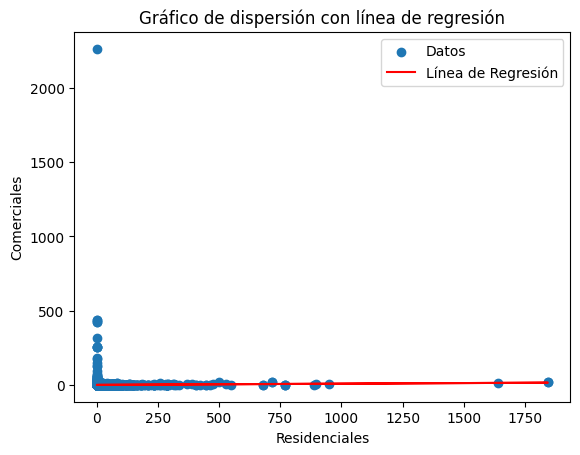

In [227]:
# Gráfico de dispersión
plt.scatter(seis['Unidades_res'], seis['Unidades_com'], label='Datos')

# Línea de regresión
plt.plot(seis['Unidades_res'], intercept + slope * seis['Unidades_res'], color='red', label='Línea de Regresión')

plt.xlabel('Residenciales')
plt.ylabel('Comerciales')
plt.title('Gráfico de dispersión con línea de regresión')
plt.legend()
plt.show()


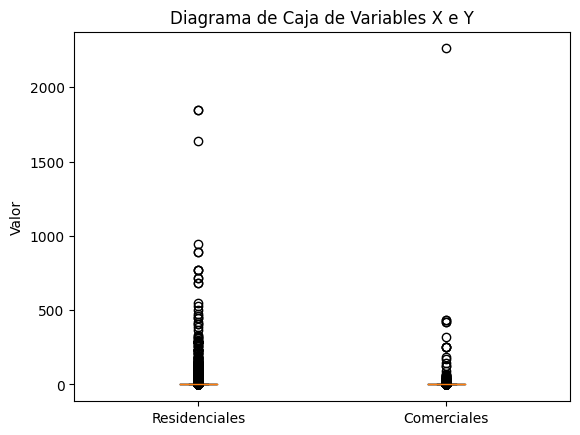

In [228]:
# Diagrama de caja
plt.boxplot([seis['Unidades_res'], seis['Unidades_com']], labels=['Residenciales', 'Comerciales'])
plt.ylabel('Valor')
plt.title('Diagrama de Caja de Variables X e Y')
plt.show()


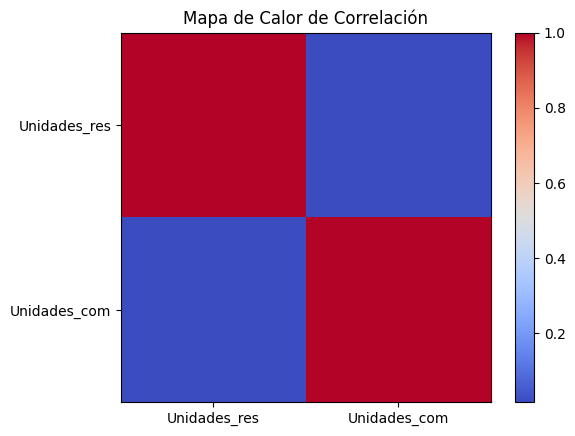

In [229]:
# Heatmap
corr_matrix = seis.corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Mapa de Calor de Correlación')
plt.show()


## Año de construcción vs Precio de venta

###Prueba Kruskal-Wallis

In [230]:
#Precios para cada año
precios_por_año = [df[df['Año'] == i]['Precio'] for i in df['Año'].unique()]
statistic, p_value = sp.stats.kruskal(*precios_por_año)

print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p de Kruskal-Wallis:", p_value)

if p_value > 0.05:
  print(" No hay evidencia suficiente para concluir que hay diferencias significativas entre los grupos.")

else:
  print(" Hay diferencias significativas entre los grupos.")


Estadístico de Kruskal-Wallis: 1458.289557728926
Valor p de Kruskal-Wallis: 4.226550865209918e-304
 Hay diferencias significativas entre los grupos.


In [231]:
año_maximo = df['Año'].max()
año_minimo = df['Año'].min()
print("Año máximo de construcción:", año_maximo)
print("Año mínimo de construcción:", año_minimo)
precio_maximo = df['Precio'].max()
precio_minimo = df['Precio'].min()
print("Precio máximo de venta:", precio_maximo)
print("Precio mínimo de venta:", precio_minimo)

Año máximo de construcción: 2010.0
Año mínimo de construcción: 1880.0
Precio máximo de venta: 2210000000.0
Precio mínimo de venta: 0.0


###Intervalos por años con el promedio de sus precios

In [232]:
#Intervalos de 10 años
precio_promedioS = df.groupby("Año")['Precio'].mean()
print(precio_promedioS)


Año
1880.0    2.150590e+06
1890.0    1.018538e+06
1900.0    1.689667e+06
1910.0    1.607814e+06
1920.0    1.122346e+06
1930.0    9.279704e+05
1940.0    6.932156e+05
1950.0    5.931444e+05
1960.0    1.169877e+06
1970.0    1.020713e+06
1980.0    1.400054e+06
1990.0    7.150246e+05
2000.0    1.343411e+06
2010.0    1.664849e+06
Name: Precio, dtype: float64


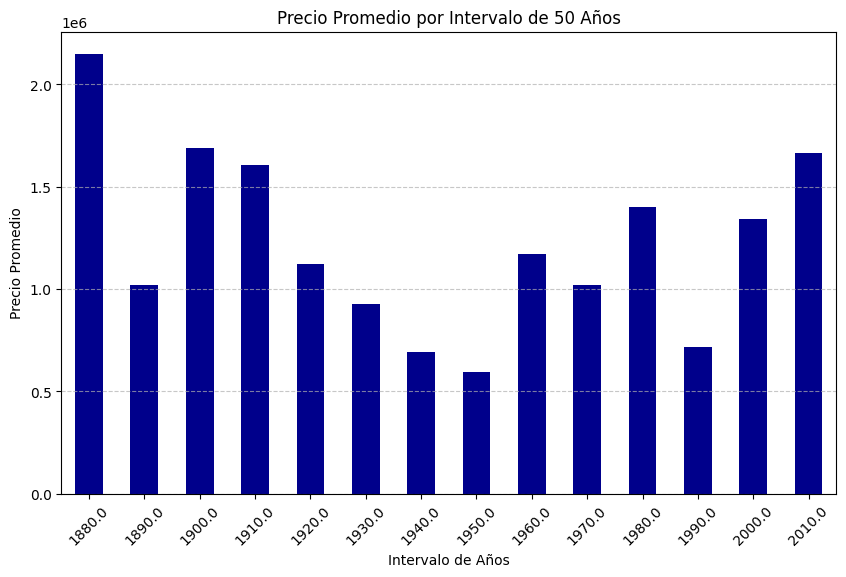

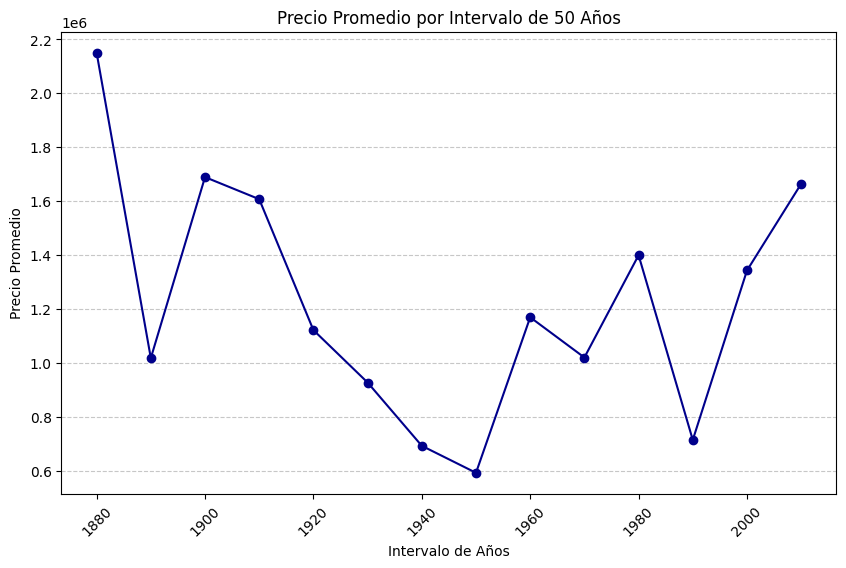

In [233]:
plt.figure(figsize=(10, 6))
precio_promedioS.plot(kind='bar', color="darkblue")
plt.title('Precio Promedio por Intervalo de 50 Años')
plt.xlabel('Intervalo de Años')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
precio_promedioS.plot(kind='line', color="darkblue", marker='o', linestyle='-')
plt.title('Precio Promedio por Intervalo de 50 Años')
plt.xlabel('Intervalo de Años')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Distrito vs. Precio de venta

In [234]:
precios_por_distrito = []
for i in df['Distrito'].unique():
    precios_por_distrito.append(df[df['Distrito'] == i]['Precio'])

statistic, p_value = sp.stats.kruskal(*precios_por_distrito)
print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p :", p_value)

print("Valor p:", p_value)
if p_value > 0.05:
    print("No hay diferencias significativas entre los precios de los distritos.")
else:
    print(" Hay diferencias significativas entre los precios de los distritos.")


Estadístico de Kruskal-Wallis: 12448.23287457075
Valor p : 0.0
Valor p: 0.0
 Hay diferencias significativas entre los precios de los distritos.


In [235]:
num_distritos = df['Distrito'].nunique()
print("Número de distritos únicos:", num_distritos)
df['Distrito'].unique()

Número de distritos únicos: 5


array(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

In [236]:
conteo_por_distrito = df['Distrito'].value_counts()
print(conteo_por_distrito)

Distrito
Queens           26736
Brooklyn         24047
Manhattan        18306
Staten Island     8410
Bronx             7049
Name: count, dtype: int64


#### El promedio de precio por distrito

In [237]:
precio_promedio_distrito = df.groupby('Distrito')['Precio'].mean()
print(precio_promedio_distrito)

Distrito
Bronx            5.901936e+05
Brooklyn         8.344884e+05
Manhattan        2.803181e+06
Queens           6.368966e+05
Staten Island    4.650731e+05
Name: Precio, dtype: float64


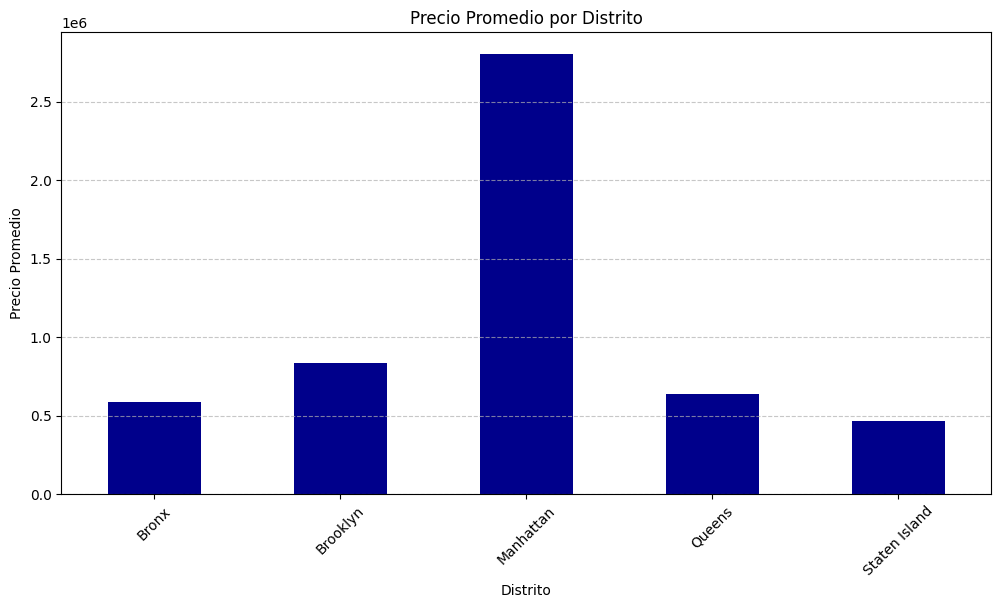

In [238]:
plt.figure(figsize=(12, 6))
precio_promedio_distrito.plot(kind='bar', color="darkblue")
plt.title('Precio Promedio por Distrito')
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Precio de Venta vs. Distrito vs. Año de Construcción

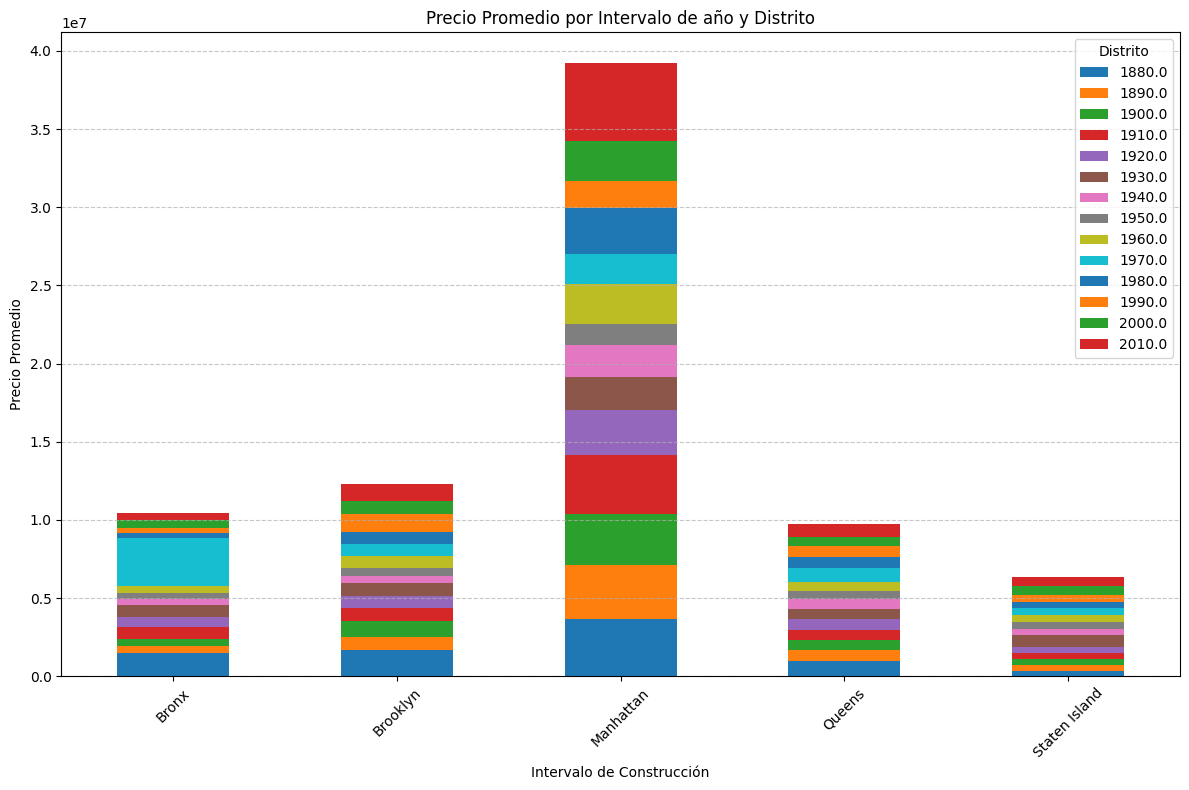

In [239]:
precio_promedio_por_intervalo = df.groupby(['Distrito', 'Año'])['Precio'].mean().unstack()

precio_promedio_por_intervalo.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Precio Promedio por Intervalo de año y Distrito')
plt.xlabel('Intervalo de Construcción')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Distrito')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Clase fiscal vs. Precio de venta

In [240]:
precios_por_clase_fiscal = []
for i in df['fventa'].unique():
    precios_por_clase_fiscal.append(df[df['fventa'] == i]['Precio'])

statistic, p_value = sp.stats.kruskal(*precios_por_clase_fiscal)
print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p :", p_value)

if p_value > 0.05:
    print("No hay diferencias significativas entre los precios de las clases fiscales.")
else:
    print("Hay diferencias significativas entre los precios de las clases fiscales.")


Estadístico de Kruskal-Wallis: 4316.78325181936
Valor p : 0.0
Hay diferencias significativas entre los precios de las clases fiscales.


In [241]:
precio_promedio_clase = df.groupby('fventa')['Precio'].mean()
precio_promedio_clase

fventa
Clase 1    5.601986e+05
Clase 2    1.387492e+06
Clase 3    8.909685e+05
Clase 4    3.540855e+06
Name: Precio, dtype: float64

### El precio promedio por cada clase

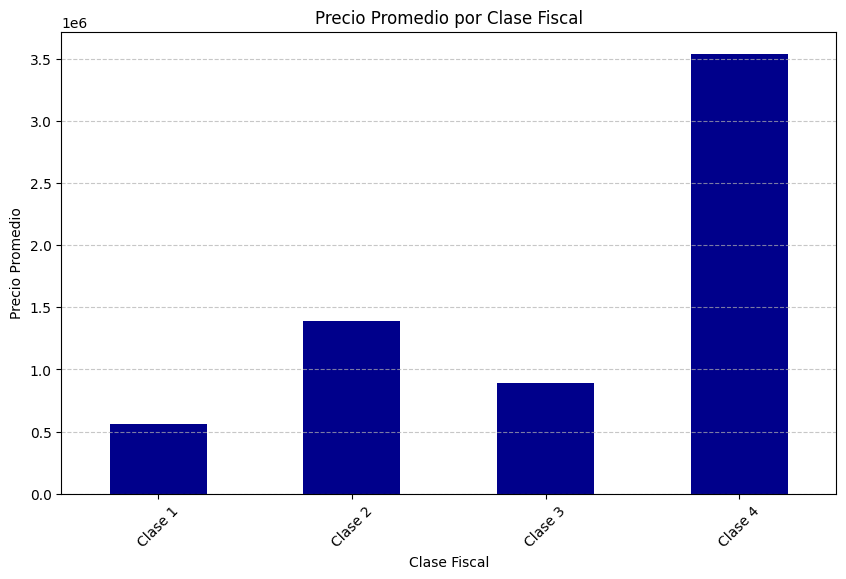

In [242]:
precio_promedio_por_clase = df.groupby('fventa')['Precio'].mean()

plt.figure(figsize=(10, 6))
precio_promedio_clase.plot(kind='bar', color="darkblue")
plt.title('Precio Promedio por Clase Fiscal')
plt.xlabel('Clase Fiscal')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Precio de Venta vs. Distrito vs. Clase Fiscal

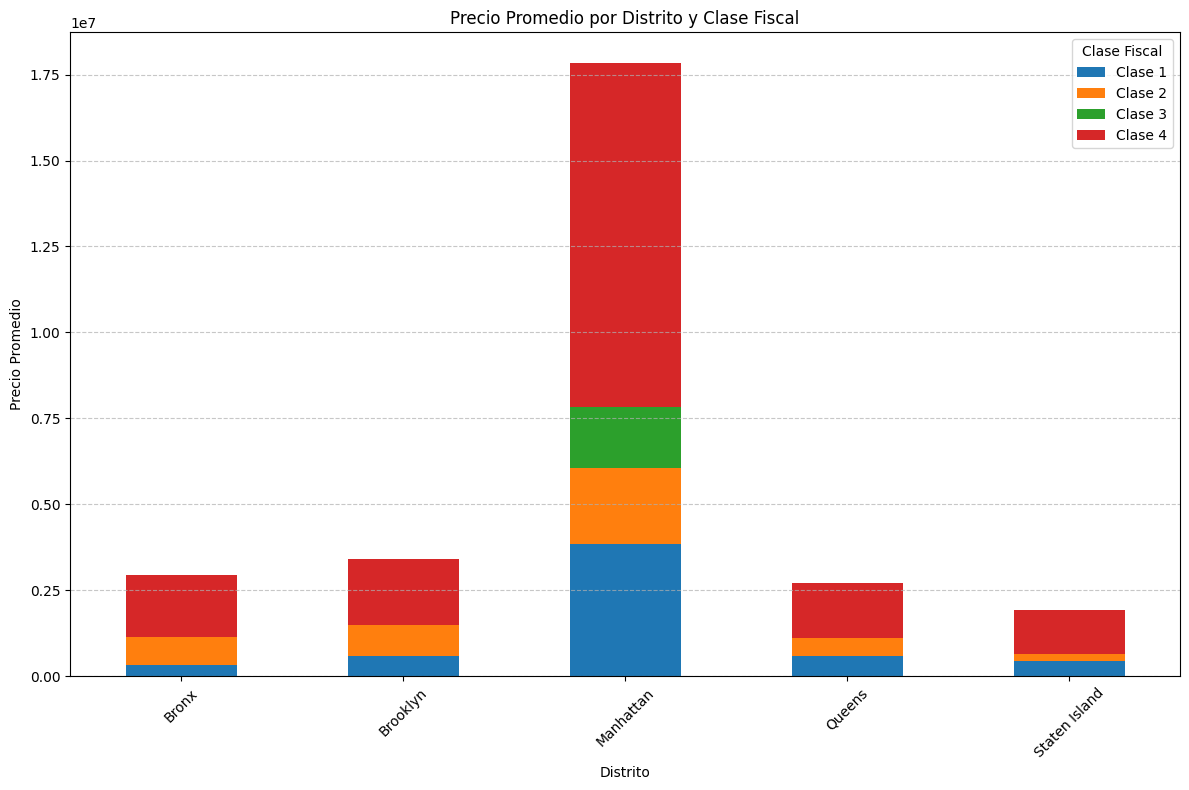

In [243]:
precio_promedio_por_distrito_clase = df.groupby(['Distrito', 'fventa'])['Precio'].mean().unstack()

precio_promedio_por_distrito_clase.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Precio Promedio por Distrito y Clase Fiscal')
plt.xlabel('Distrito')
plt.ylabel('Precio Promedio')
plt.xticks(rotation=45)
plt.legend(title='Clase Fiscal')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



### Clases Fiscales por Distrito

In [244]:
distritos = df['Distrito'].unique()
clases_por_distrito = {}
for i in distritos:
    distrito_d = df[df['Distrito'] == i]
    clase_contar = distrito_d['fventa'].value_counts()
    clases_por_distrito[i] = clase_contar
for distrito, clases_contar in clases_por_distrito.items():
    print("Distrito:", distrito)
    print(clases_contar)



Distrito: Manhattan
fventa
Clase 2    16581
Clase 4     1368
Clase 1      355
Clase 3        2
Name: count, dtype: int64
Distrito: Bronx
fventa
Clase 1    4404
Clase 2    2114
Clase 4     529
Clase 3       2
Name: count, dtype: int64
Distrito: Brooklyn
fventa
Clase 1    12665
Clase 2     9120
Clase 4     2262
Name: count, dtype: int64
Distrito: Queens
fventa
Clase 1    16541
Clase 2     8431
Clase 4     1764
Name: count, dtype: int64
Distrito: Staten Island
fventa
Clase 1    7568
Clase 2     480
Clase 4     362
Name: count, dtype: int64


## Tipo de construcción vs. Precio de venta

In [245]:
precios_por_eactual = []
for i in df['eactual'].unique():
    precios_por_eactual.append(df[df['eactual'] == i]['Precio'])

statistic, p_valor = sp.stats.kruskal(*precios_por_eactual)


print("Estadístico de Kruskal-Wallis:", statistic)
print("Valor p:", p_valor)

if p_valor > 0.05:
    print("No hay diferencias significativas entre los precios")
else:
    print("Hay diferencias significativas entre los precios")


Estadístico de Kruskal-Wallis: 12447.027060970475
Valor p: 0.0
Hay diferencias significativas entre los precios


In [258]:
df_tipos = pd.DataFrame()
df_tipos['tiene_apartamento'] = df['eactual'].str.contains('apartment', case=False)
df_tipos['tiene_condo'] = df['eactual'].str.contains('condo', case=False)
df_tipos['tiene_residencia'] = df['eactual'].str.contains('residence', case=False)
df_tipos['tiene_negocio'] = df['eactual'].str.contains('business', case=False)
df_tipos['tiene_ascensor'] = df['eactual'].str.contains('elevator', case=False)
df_tipos['tiene_tienda'] = df['eactual'].str.contains('store', case=False)
df_tipos['tiene_oficina'] = df['eactual'].str.contains('office', case=False)
df_tipos['tiene_hotel'] = df['eactual'].str.contains('hotel', case=False)
df_tipos['tiene_fabrica'] = df['eactual'].str.contains('factory', case=False)
df_tipos

,tiene_apartamento,tiene_condo,tiene_residencia,tiene_negocio,tiene_ascensor,tiene_tienda,tiene_oficina,tiene_hotel,tiene_fabrica
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False


5888467.948717949
1571290.371641128
1839953.3228346456
56609.37142857143
1477938.1695624073
2922259.7096018735
4418947.166088632
6037586.731225297
3605553.8552631577


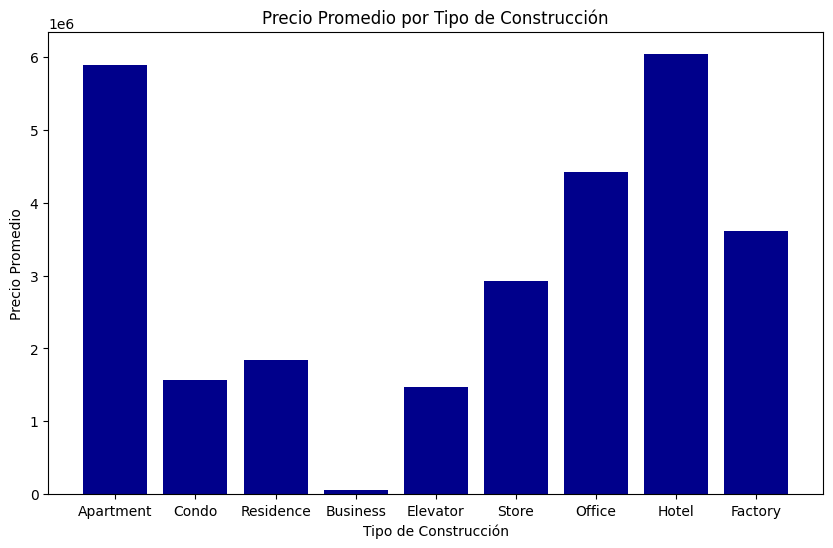

In [260]:
diccionario = {
    'tiene_apartamento': 'Apartment',
    'tiene_condo': 'Condo',
    'tiene_residencia': 'Residence',
    'tiene_negocio': 'Business',
    'tiene_ascensor': 'Elevator',
    'tiene_tienda': 'Store',
    'tiene_oficina': 'Office',
    'tiene_hotel': 'Hotel',
    'tiene_fabrica': 'Factory'
}
df_tipos["Precio"]=df["Precio"]
precios_promedio = {}
for i, valor in diccionario.items():
    if df_tipos[i].any():  #Mira que este algun elemento en la caracteristica
        print(df_tipos[df_tipos[i]]['Precio'].mean())
        precios_promedio[valor] = df_tipos[df_tipos[i]]['Precio'].mean()


plt.figure(figsize=(10, 6))
plt.bar(precios_promedio.keys(), precios_promedio.values(), color='darkblue')
plt.xlabel('Tipo de Construcción')
plt.ylabel('Precio Promedio')
plt.title('Precio Promedio por Tipo de Construcción')
plt.show()


In [261]:
tipos_construccion = df['eactual'].value_counts()
print(tipos_construccion)


eactual
CONDO; RESIDENTIAL UNIT IN ELEVATOR BLDG.          12887
ELEVATOR COOPERATIVE                               12790
TWO STORIES - DETACHED SM OR MID                    6768
ONE FAMILY ATTACHED OR SEMI-DETACHED                5713
TWO FAMILY FRAME                                    4946
                                                   ...  
CONDO; COMML.UNIT OF 1-3 UNIT BLDG-ORIG CLASS 1        1
MUSEUM                                                 1
MISCELLANEOUS THEATRE                                  1
MISSION HOUSE (NON-RESIDENTIAL)                        1
EASEMENT                                               1
Name: count, Length: 166, dtype: int64


In [262]:
df[df["Precio"]==2210000000.0]

,Barrio,Distrito,Año,eactual,fventa,Unidades_res,Unidades_com,Precio,Fecha
7447,MIDTOWN CBD,Manhattan,1960.0,OFFICE ONLY WITH OR WITHOUT COMM - 20 STORIES ...,Clase 4,0,35,2.210000e+09,2017-05-05


In [263]:
df["Precio"].max()

2210000000.0

###Las 5 construcciones mas nombradas y el promedio de precio de ellos

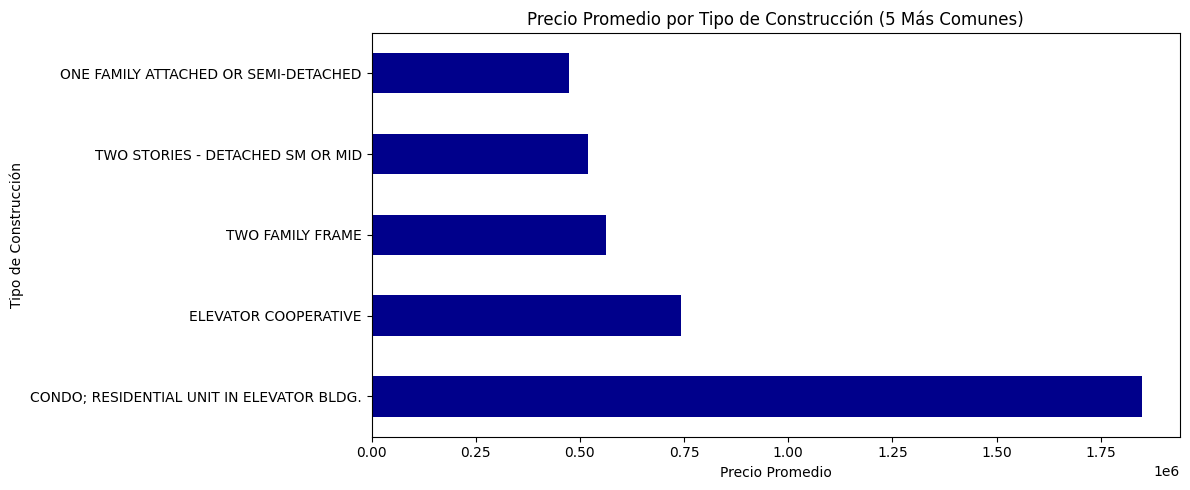

In [264]:
precio_prom_por_tipo = df.groupby('eactual')['Precio'].mean()

tipos_comunes = df['eactual'].value_counts().head(5).index #Los 5 valores mas repetidos

precio_prom_comunes = precio_prom_por_tipo.loc[tipos_comunes]

plt.figure(figsize=(12, 5))
precio_prom_comunes.sort_values().plot(kind='barh', color='darkblue')
plt.xlabel('Precio Promedio')
plt.ylabel('Tipo de Construcción')
plt.title('Precio Promedio por Tipo de Construcción (5 Más Comunes)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Unidades residenciales vs. Precio de venta

In [265]:
correlacion_p = df['Unidades_res'].corr(df['Precio'], method='pearson')


correlacion_k = df['Unidades_res'].corr(df['Precio'], method='kendall')

correlacion_s= df['Unidades_res'].corr(df['Precio'], method='spearman')

print("Correlación de Pearson:", correlacion_p)
print("Correlación de Kendall:", correlacion_k)
print("Correlación de Spearman:", correlacion_s)


Correlación de Pearson: 0.09431572281308068
Correlación de Kendall: 0.034565022534416734
Correlación de Spearman: 0.038529827674879565


## Unidades comerciales vs. Precio de venta

In [266]:
correlacion_p = df['Unidades_com'].corr(df['Precio'], method='pearson')


correlacion_k = df['Unidades_com'].corr(df['Precio'], method='kendall')

correlacion_s= df['Unidades_com'].corr(df['Precio'], method='spearman')

print("Correlación de Pearson:", correlacion_p)
print("Correlación de Kendall:", correlacion_k)
print("Correlación de Spearman:", correlacion_s)

Correlación de Pearson: 0.04345374783648498
Correlación de Kendall: 0.0013857446784786248
Correlación de Spearman: 0.0015442478422812993
